In [1]:
import torch
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
import numpy as np
import os
import nrrd
import pytorch_lightning as pl
from monai.data import Dataset, DataLoader
from monai.transforms import Compose, Lambda, RandSpatialCrop, RandRotate90, ToTensor
from monai.networks.nets import UNet
#from monai.losses import DiceLoss
import tensorflow as tf
from torch.utils.tensorboard import SummaryWriter

In [22]:
import shutil

def clear_tensorboard_logs(log_dir):
    # Ensure the directory exists
    if os.path.exists(log_dir):
        # Delete the directory and its contents
        shutil.rmtree(log_dir)
        print("TensorBoard logs cleared successfully.")
    else:
        print("TensorBoard logs directory not found.")

def clear_logs(logs_dir):
    """Clear all logs in the specified directory."""
    try:
        shutil.rmtree(logs_dir)
        print(f"All logs in {logs_dir} have been cleared.")
    except FileNotFoundError:
        print(f"No logs found in {logs_dir}.")
def clear_runs_and_logs(logs_dir):
    """Clear all runs and logs in the specified directory."""
    try:
        shutil.rmtree(logs_dir)
        print(f"All runs and logs in {logs_dir} have been cleared.")
    except FileNotFoundError:
        print(f"No runs or logs found in {logs_dir}.")

# Specify the directory containing all runs and logs
runs_and_logs_dir = "./runs_and_logs/"
log_dir = "./logs/"
tensorboard_logs_dir = "./tensorboard_logs/"
lightning_logs_dir = "./lightning_logs/"
# Clear TensorBoard logs
clear_tensorboard_logs(log_dir)
clear_logs(lightning_logs_dir)
clear_runs_and_logs(runs_and_logs_dir)

TensorBoard logs directory not found.
No logs found in ./lightning_logs/.
No runs or logs found in ./runs_and_logs/.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: c:\Users\tgafrick\Documents\Github\RA4-Project\lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | unet          | UNet             | 4.8 M 
1 | loss_function | CrossEntropyLoss | 0     
---------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.230    Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

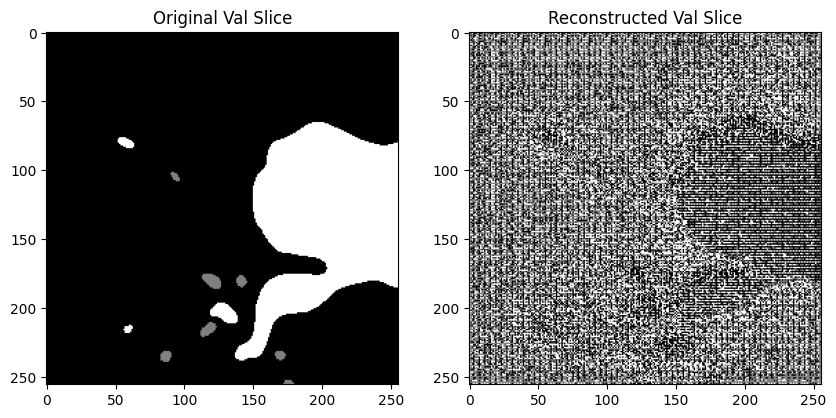

Epoch 0:   0%|          | 0/8 [00:00<?, ?it/s]                             

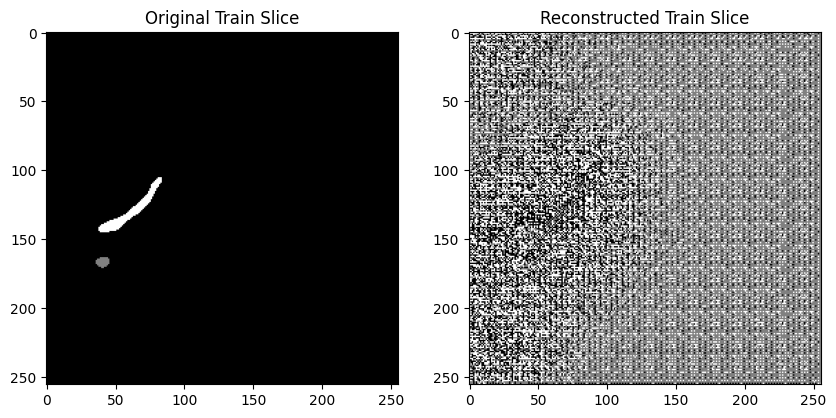

Epoch 0: 100%|██████████| 8/8 [00:17<00:00,  0.47it/s, v_num=0]

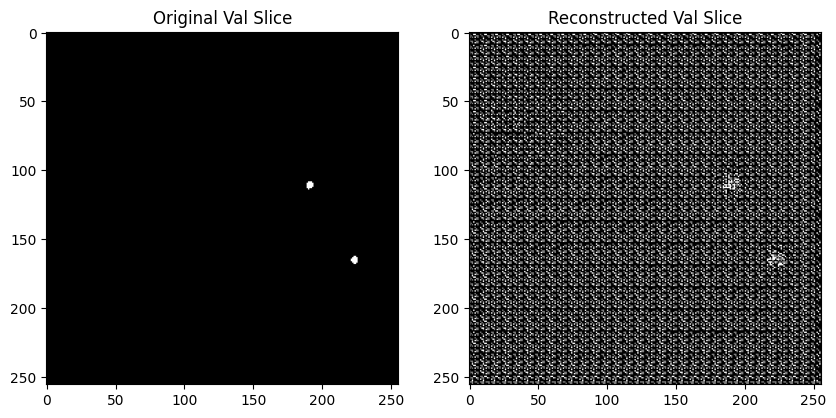

Epoch 10:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.103]       

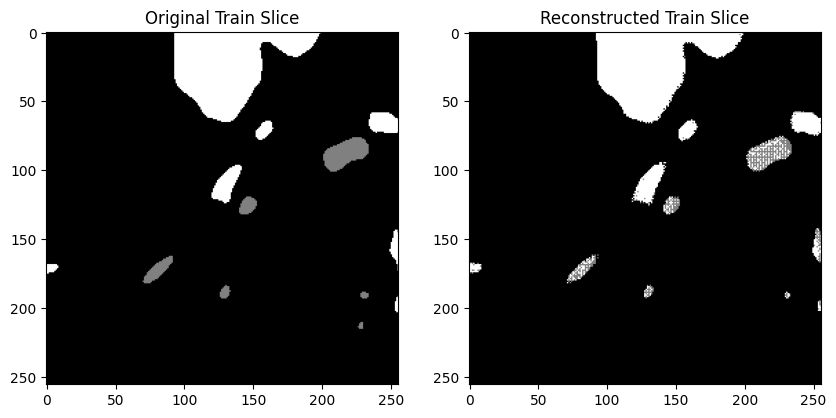

Epoch 10: 100%|██████████| 8/8 [00:23<00:00,  0.34it/s, v_num=0, val_loss=0.103]

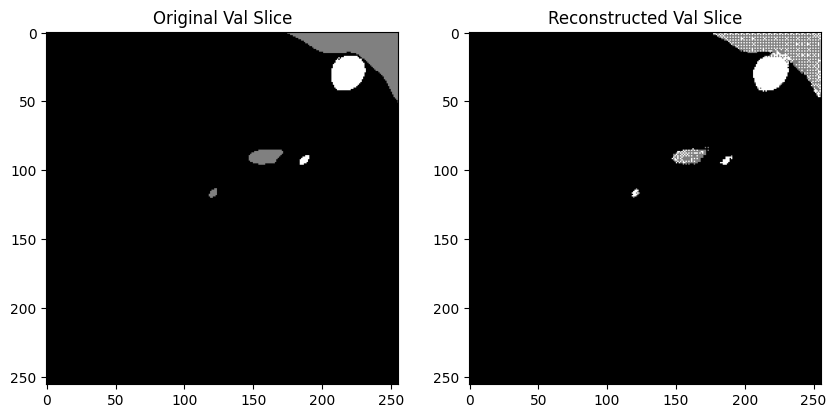

Epoch 20:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0442]        

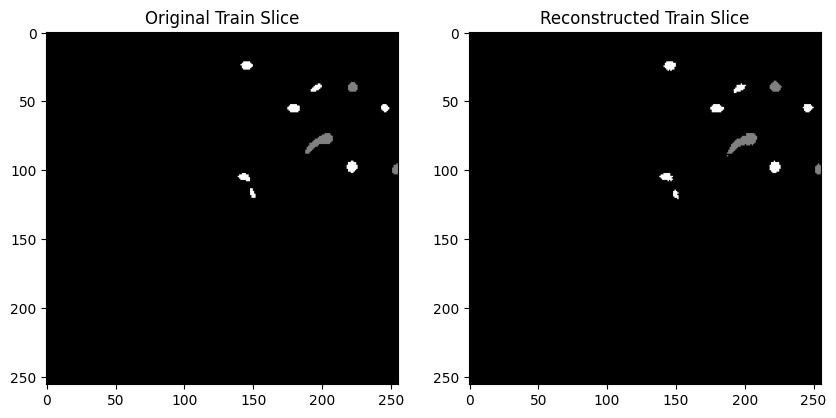

Epoch 20: 100%|██████████| 8/8 [00:22<00:00,  0.35it/s, v_num=0, val_loss=0.0442]

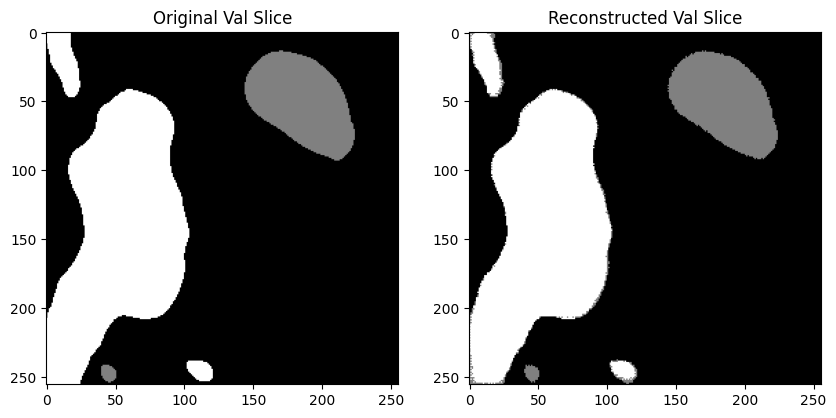

Epoch 0: 100%|██████████| 8/8 [43:26<00:00,  0.00it/s, v_num=4]    .0438]        


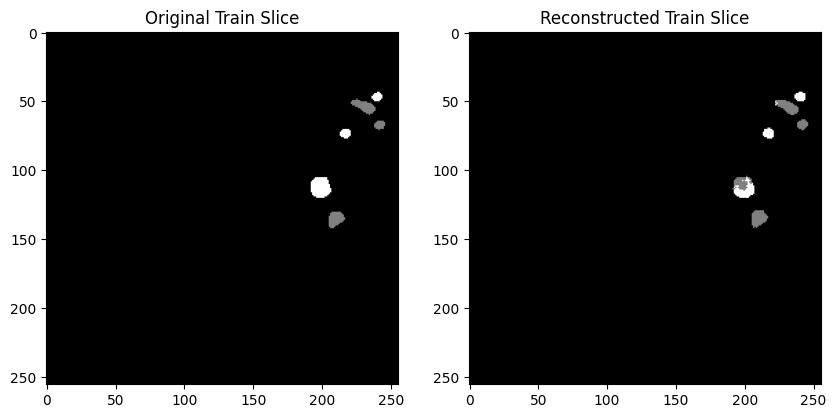

Epoch 30: 100%|██████████| 8/8 [00:17<00:00,  0.47it/s, v_num=0, val_loss=0.0438]

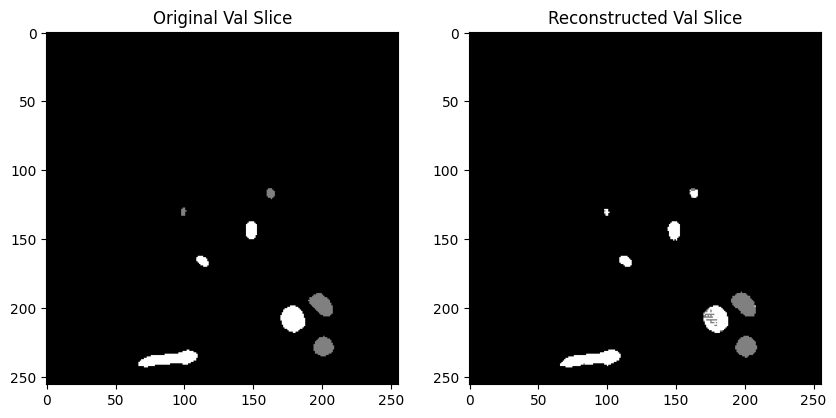

Epoch 40:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0169]        

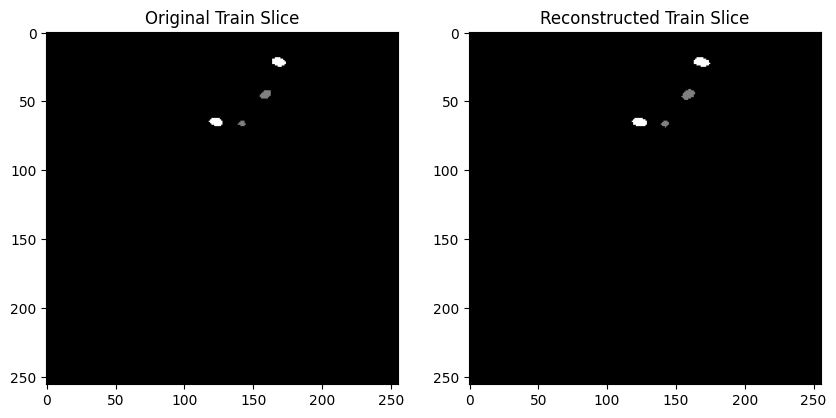

Epoch 40: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.0169]

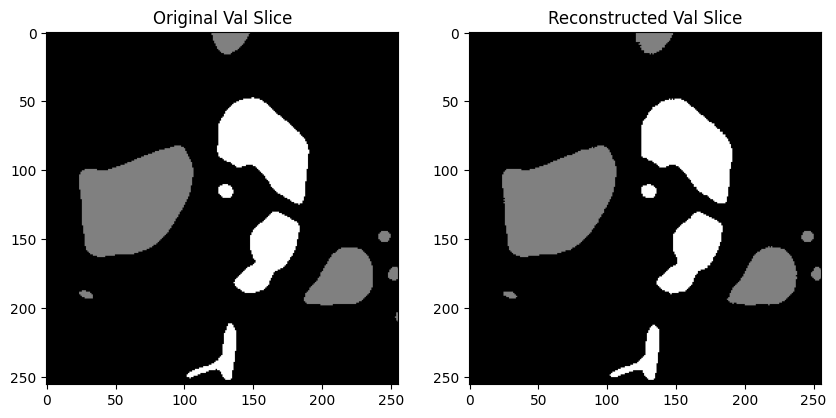

Epoch 50:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0278]        

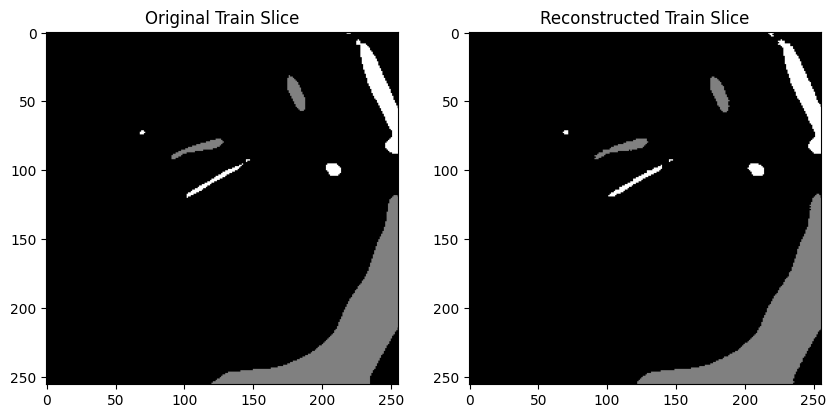

Epoch 50: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.0278]

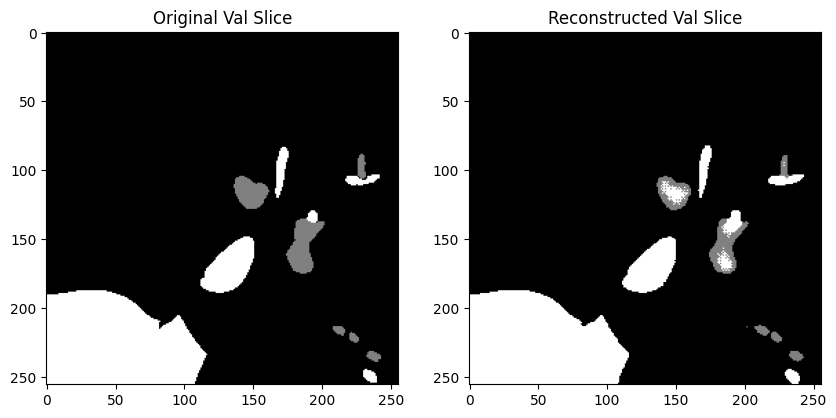

Epoch 60:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0113]        

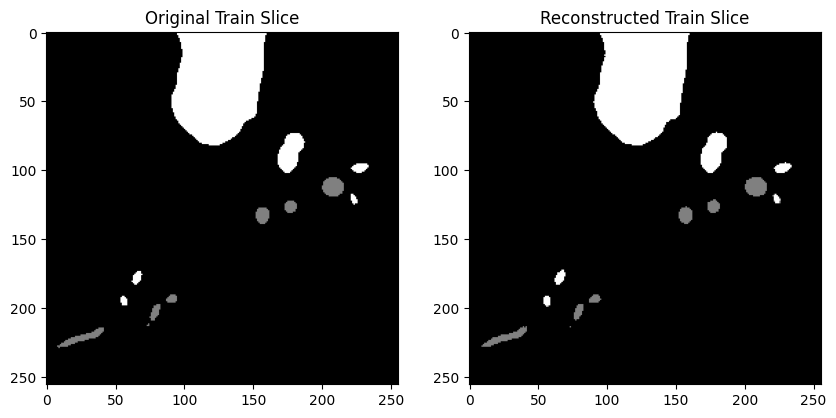

Epoch 60: 100%|██████████| 8/8 [00:16<00:00,  0.49it/s, v_num=0, val_loss=0.0113]

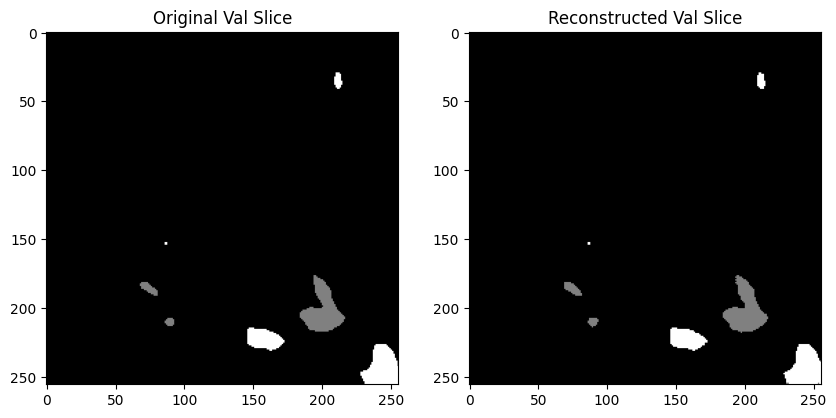

Epoch 70:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00894]        

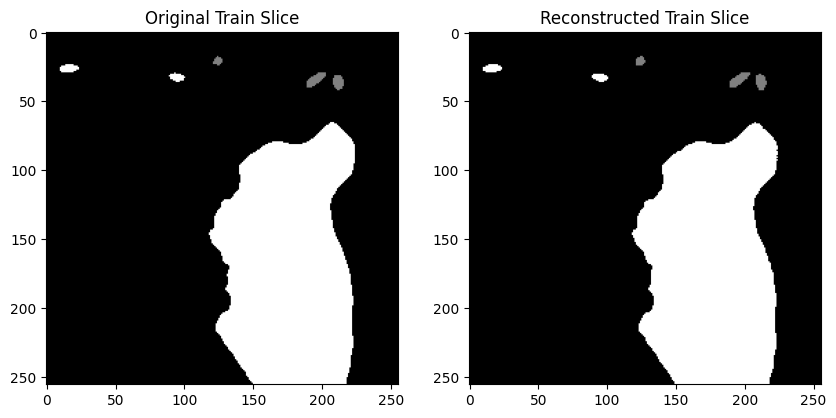

Epoch 70: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.00894]

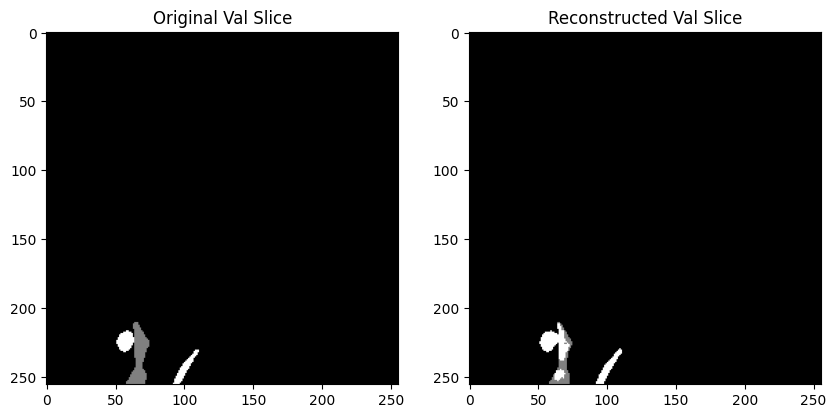

Epoch 80:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0078]         

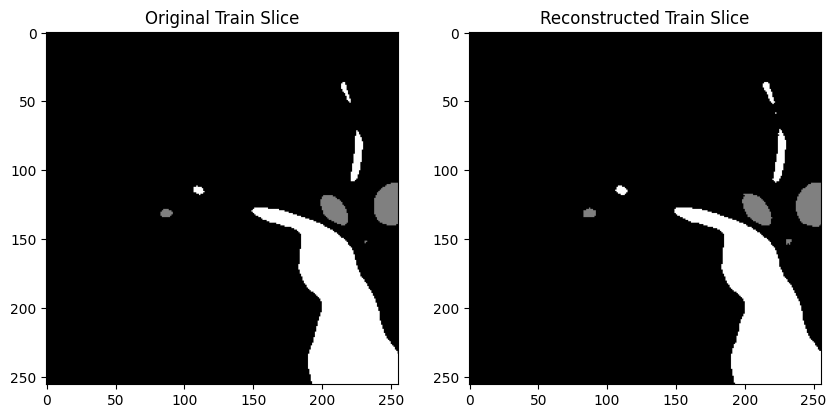

Epoch 80: 100%|██████████| 8/8 [00:16<00:00,  0.49it/s, v_num=0, val_loss=0.0078]

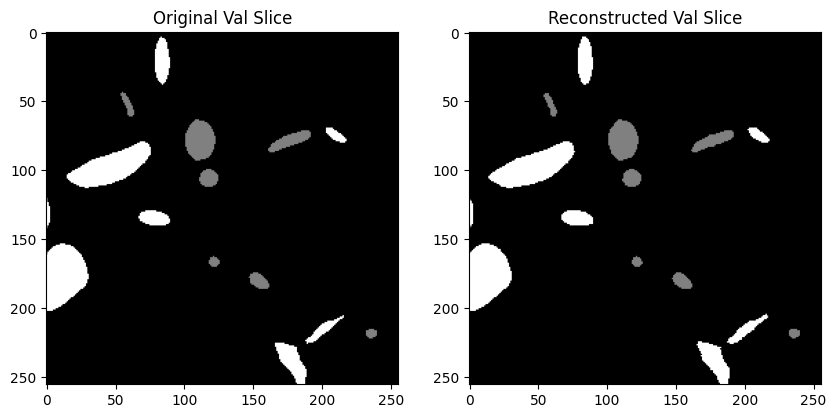

Epoch 90:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00542]        

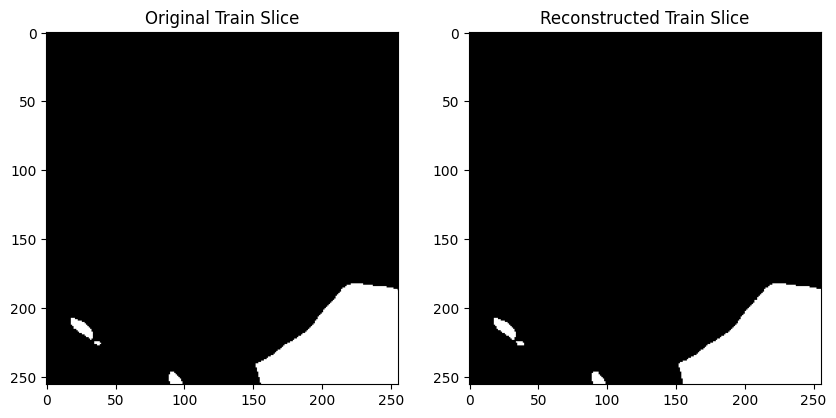

Epoch 90: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00542]

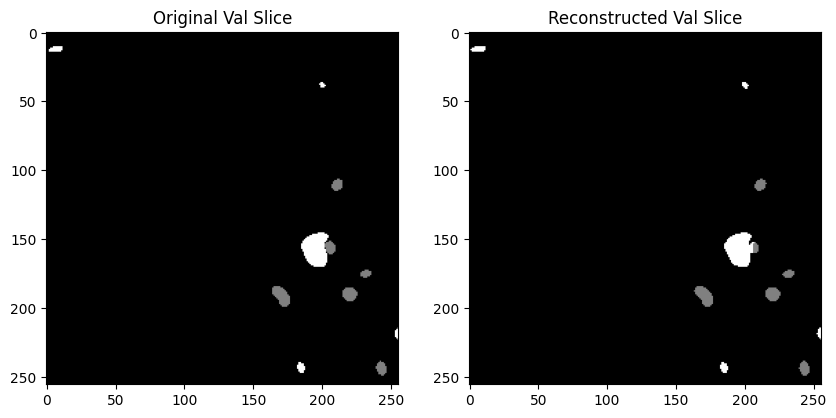

Epoch 100:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00538]       

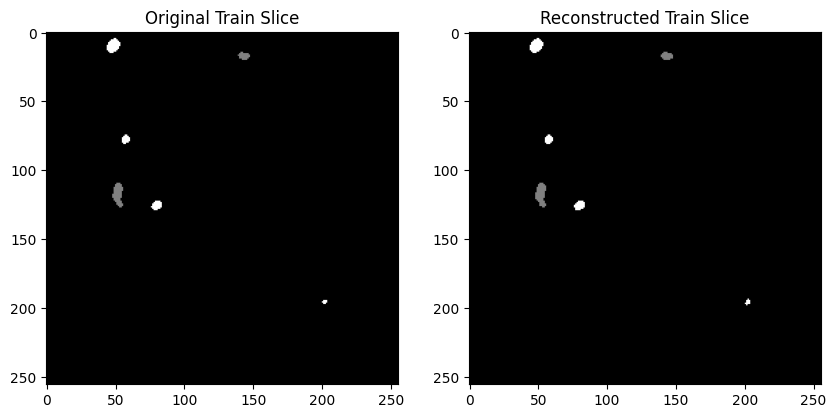

Epoch 100: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00538]

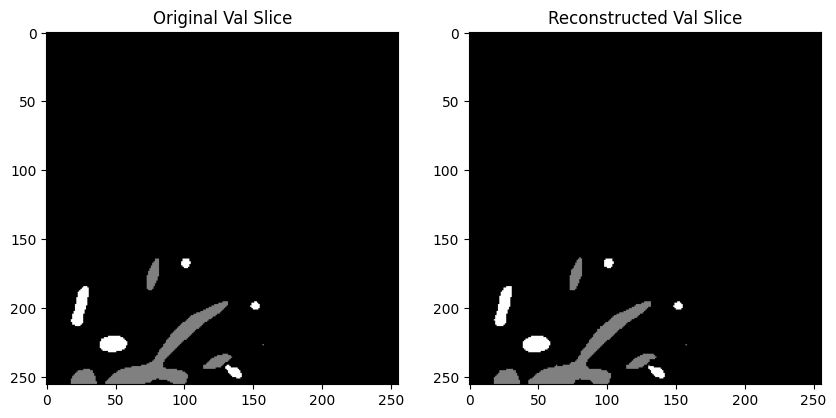

Epoch 110:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00488]        

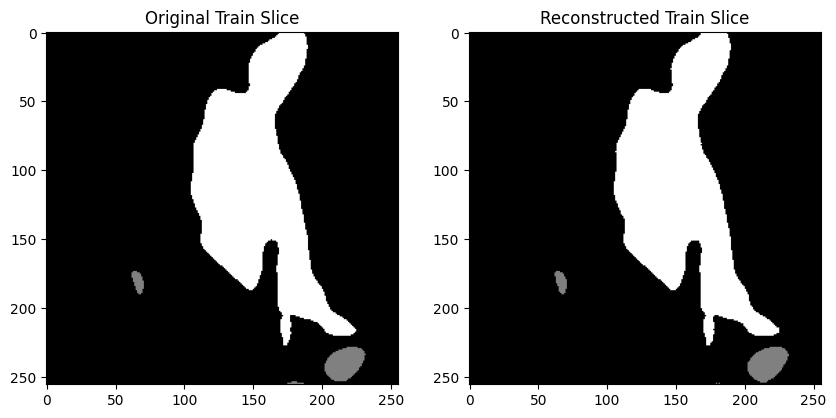

Epoch 110: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00488]

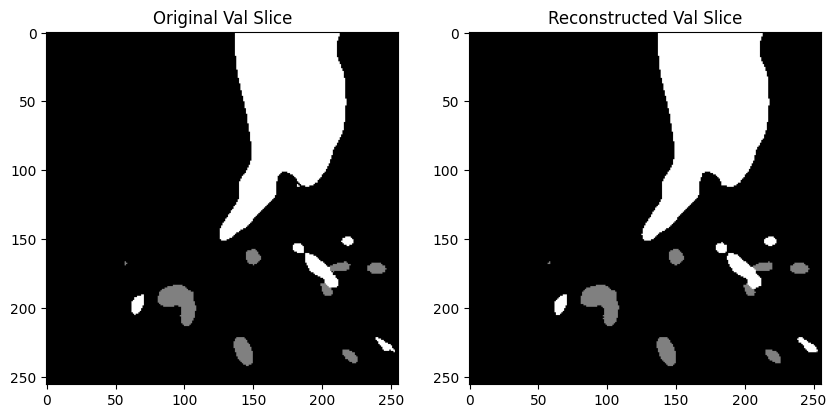

Epoch 120:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00453]        

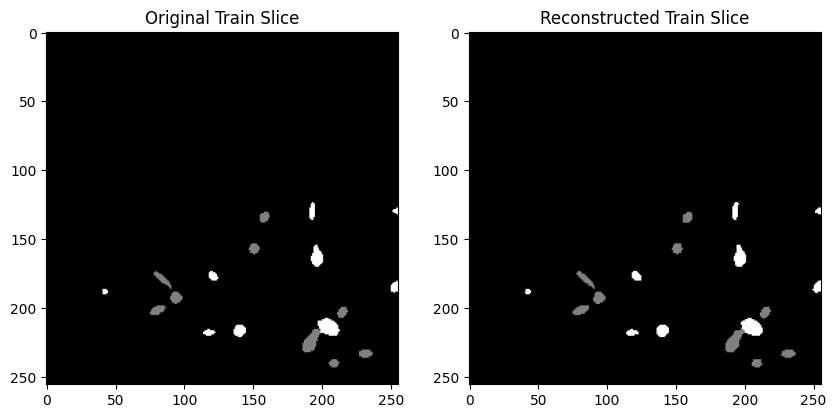

Epoch 120: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00453]

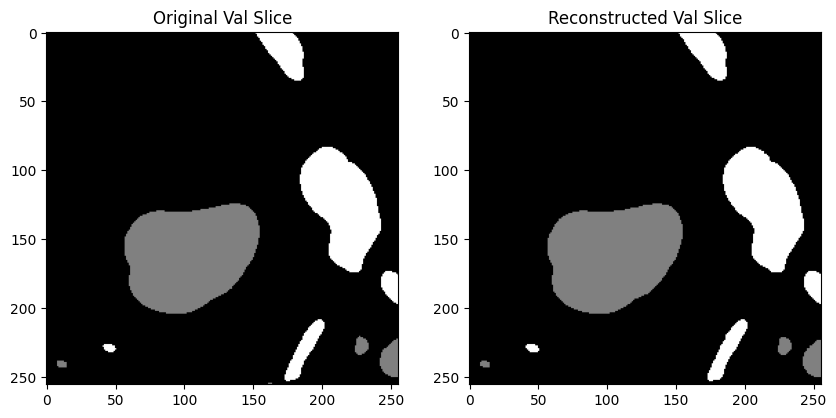

Epoch 130:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00441]        

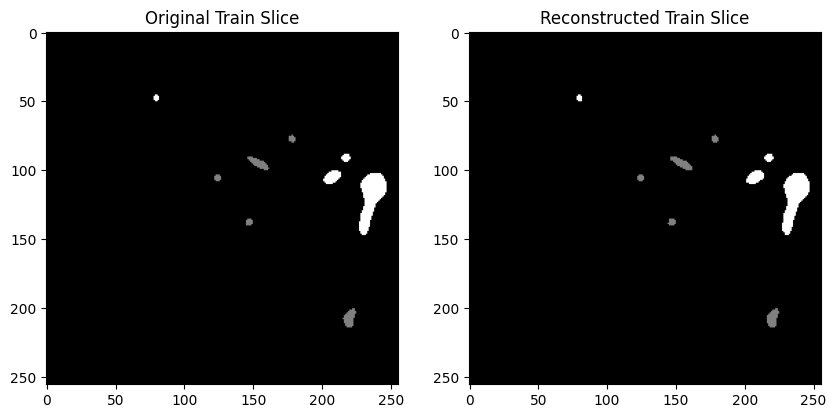

Epoch 130: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00441]

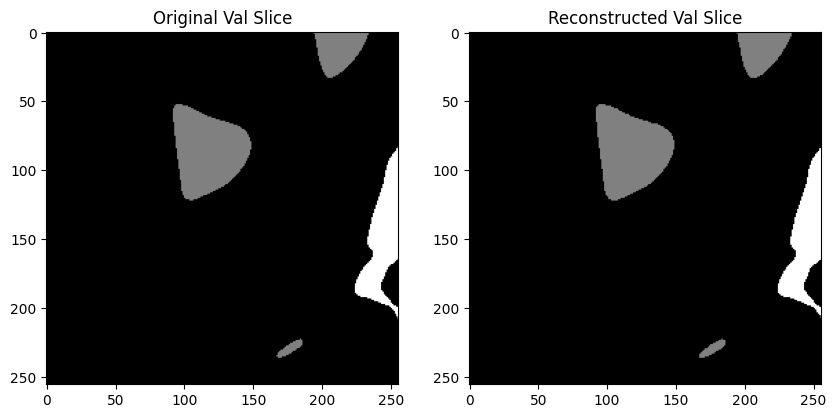

Epoch 140:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00427]        

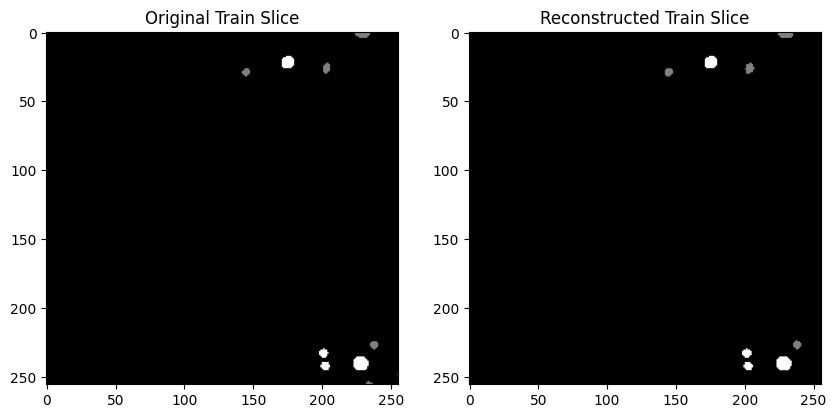

Epoch 140: 100%|██████████| 8/8 [00:16<00:00,  0.49it/s, v_num=0, val_loss=0.00427]

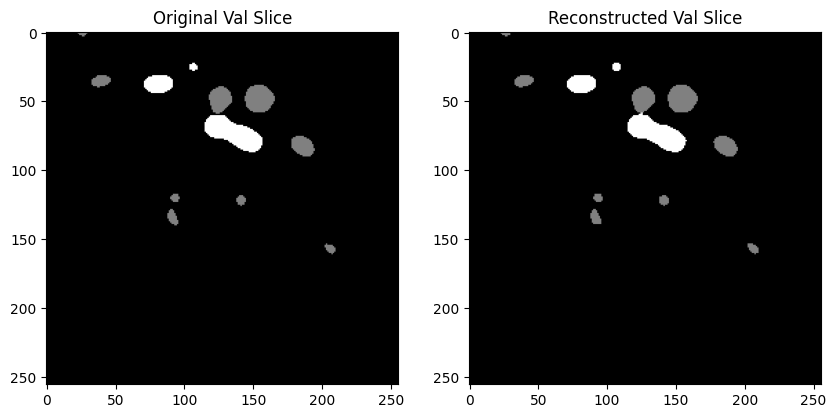

Epoch 150:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0041]         

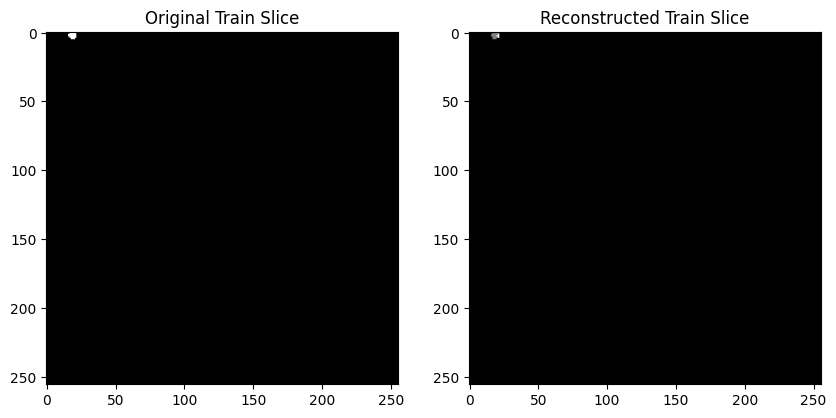

Epoch 150: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.0041]

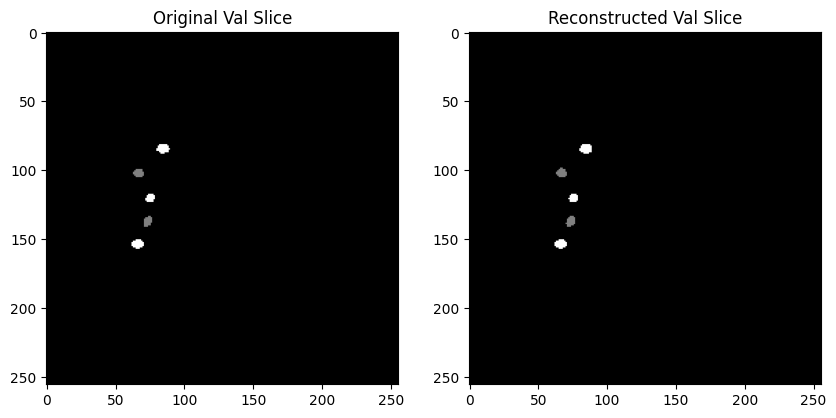

Epoch 160:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00316]        

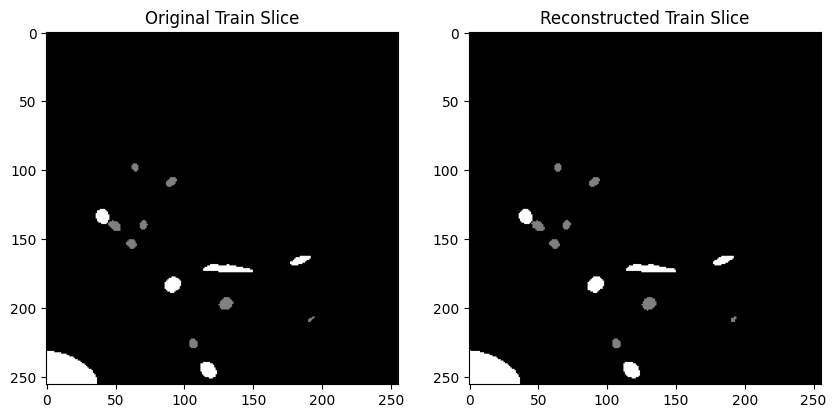

Epoch 160: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.00316]

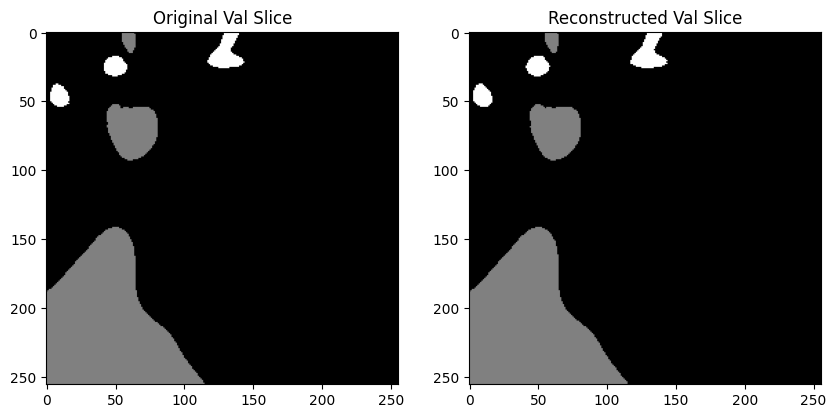

Epoch 170:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00328]        

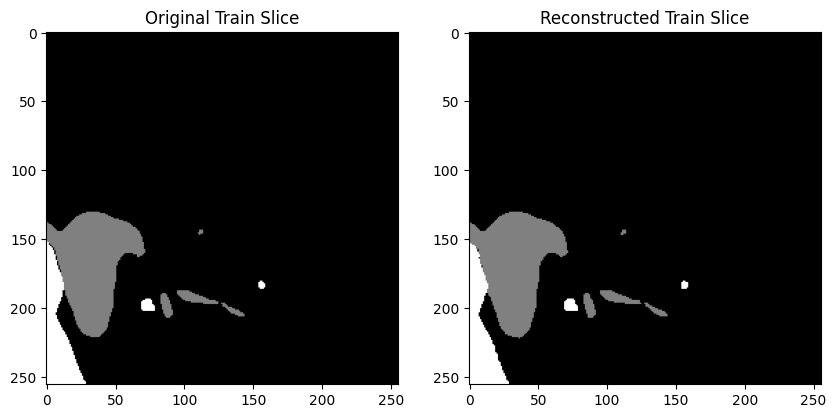

Epoch 170: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00328]

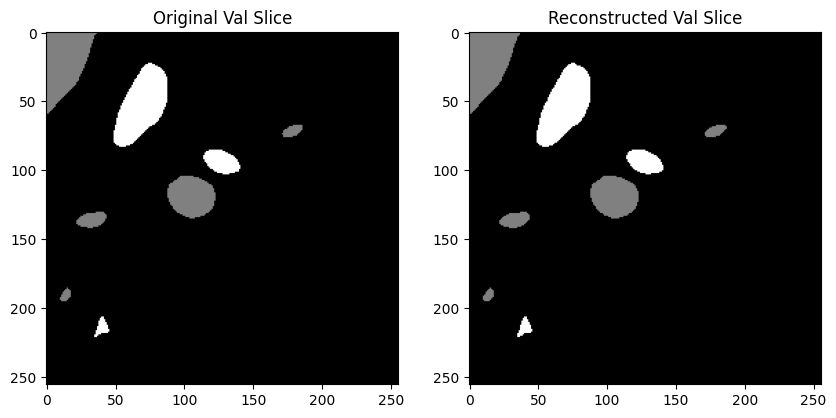

Epoch 180:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00927]        

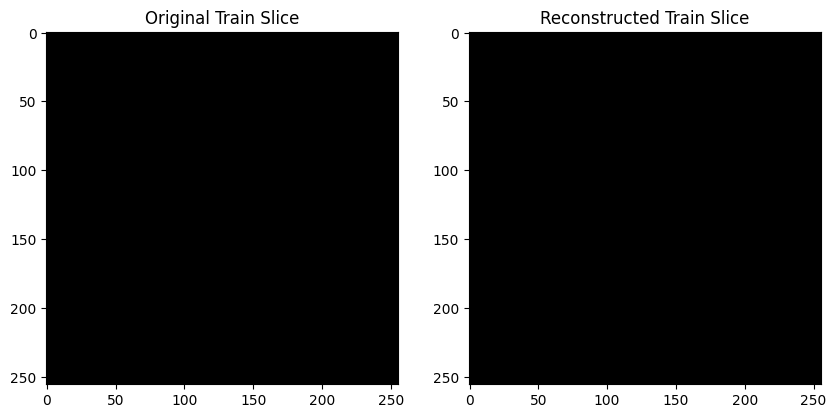

Epoch 180: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00927]

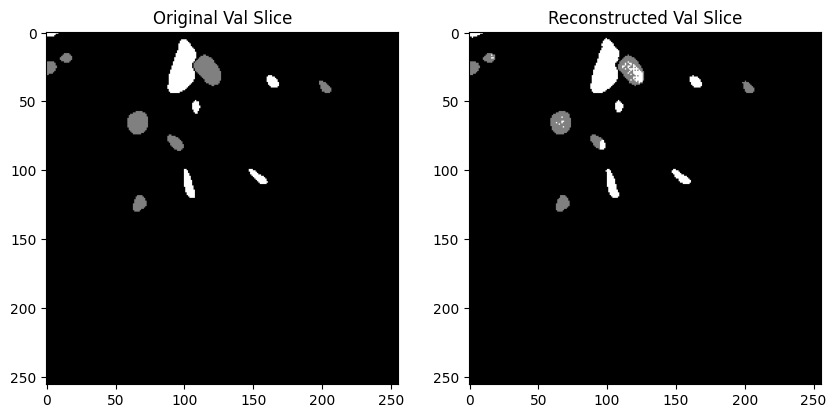

Epoch 190:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00372]        

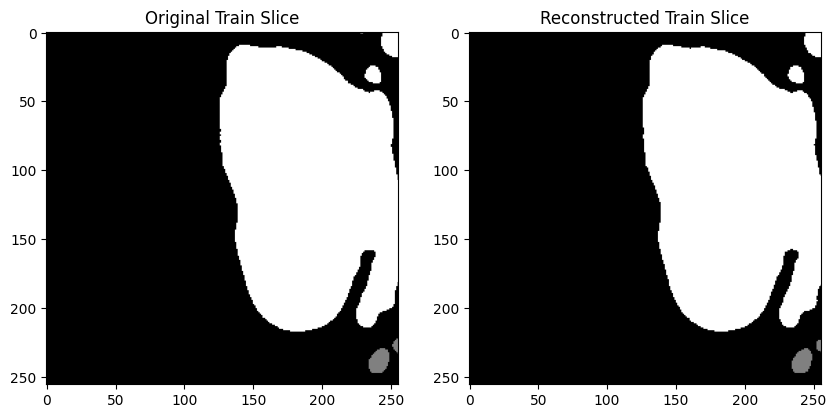

Epoch 190: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00372]

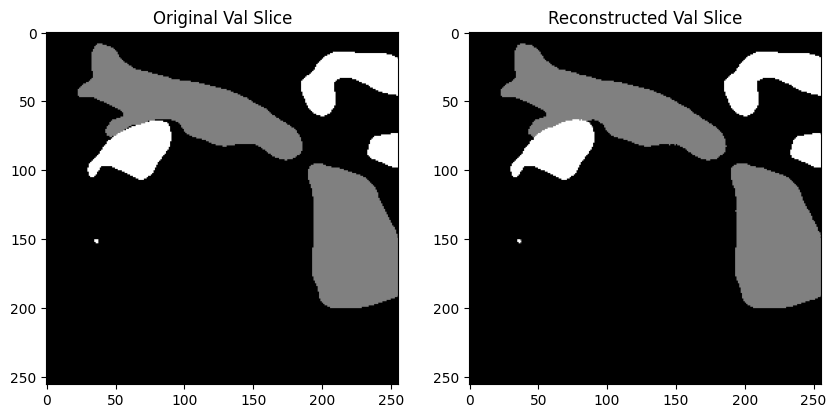

Epoch 200:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00341]        

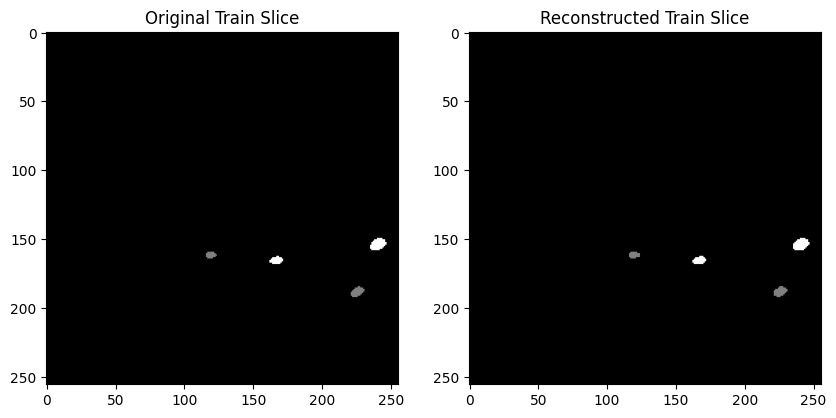

Epoch 200: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00341]

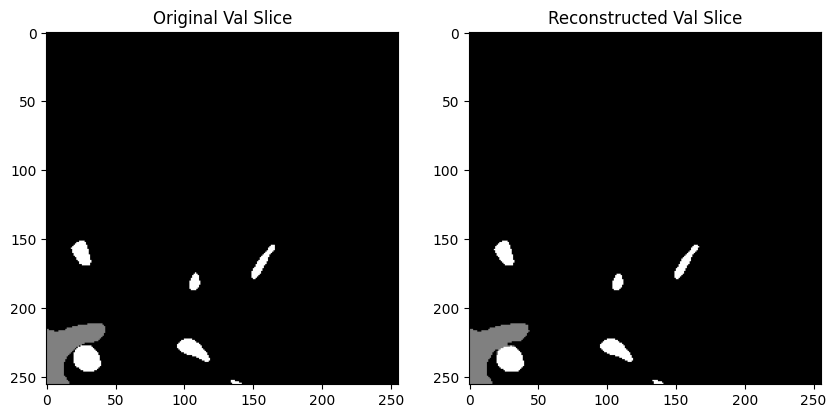

Epoch 210:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00233]        

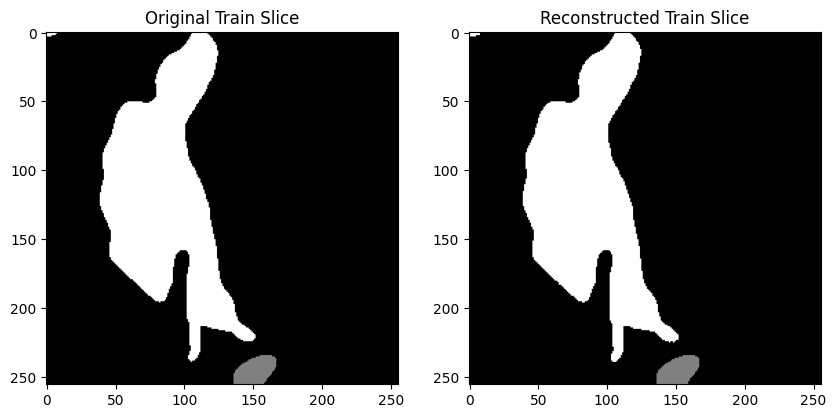

Epoch 210: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00233]

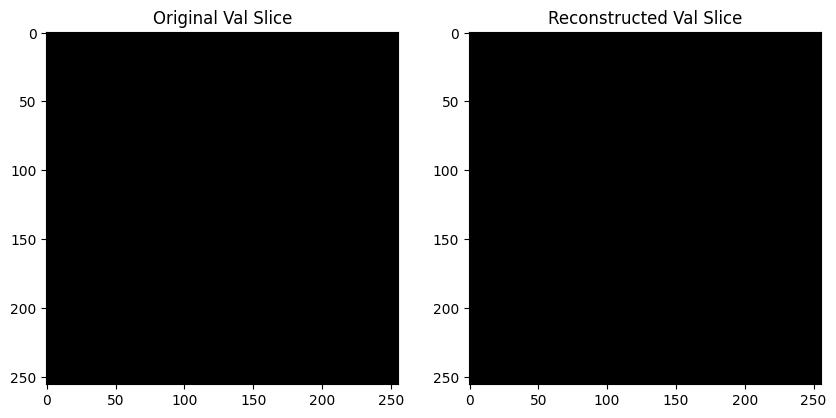

Epoch 220:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00228]        

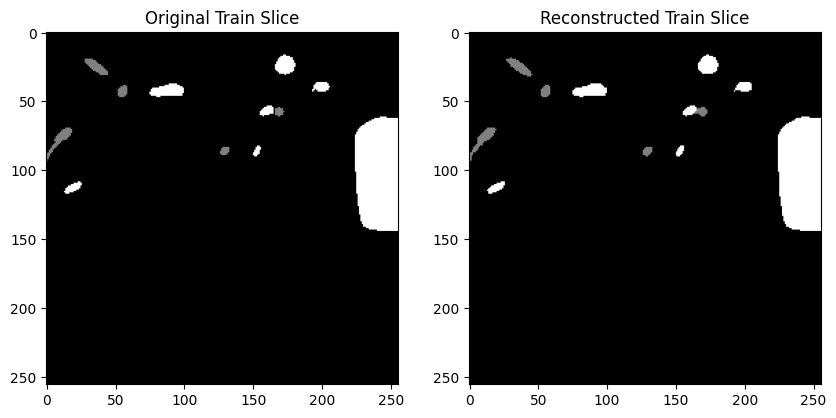

Epoch 220: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00228]

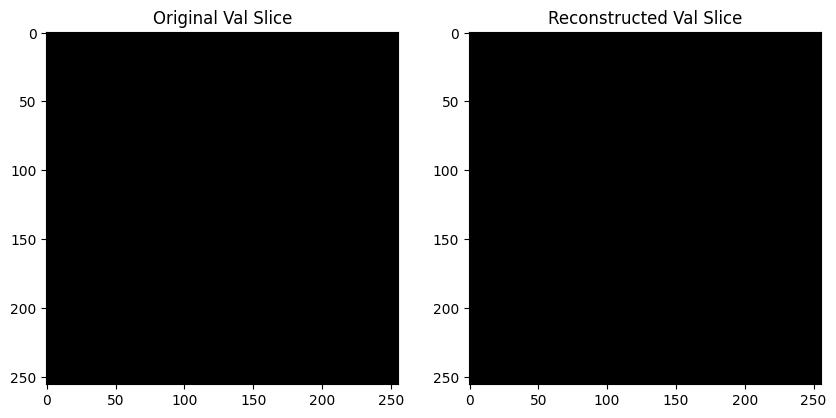

Epoch 230:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00247]        

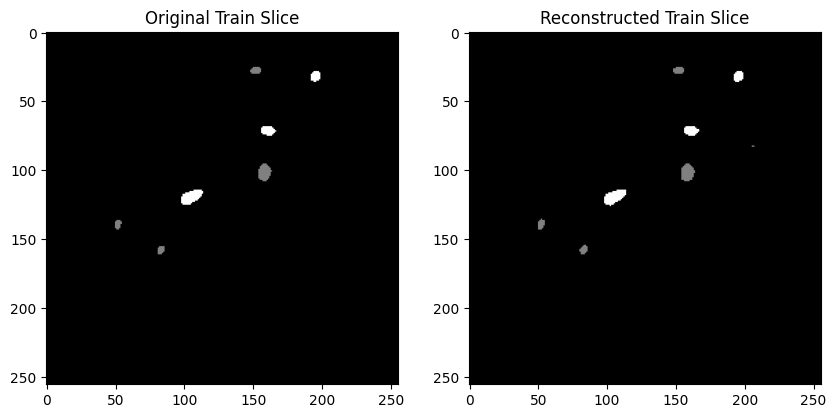

Epoch 230: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00247]

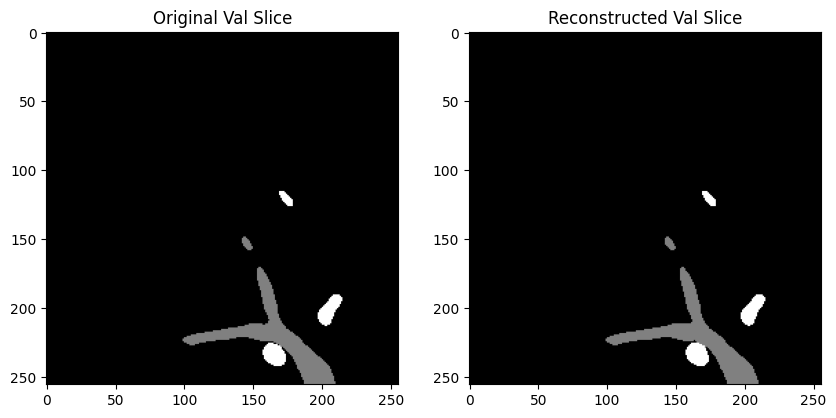

Epoch 240:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0026]         

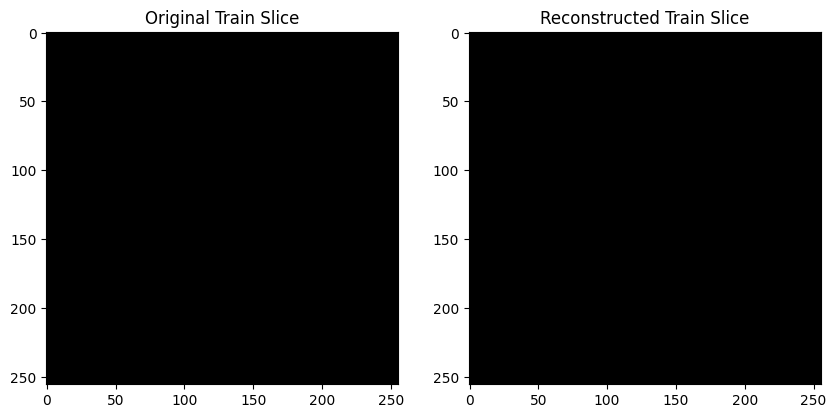

Epoch 240: 100%|██████████| 8/8 [00:17<00:00,  0.47it/s, v_num=0, val_loss=0.0026]

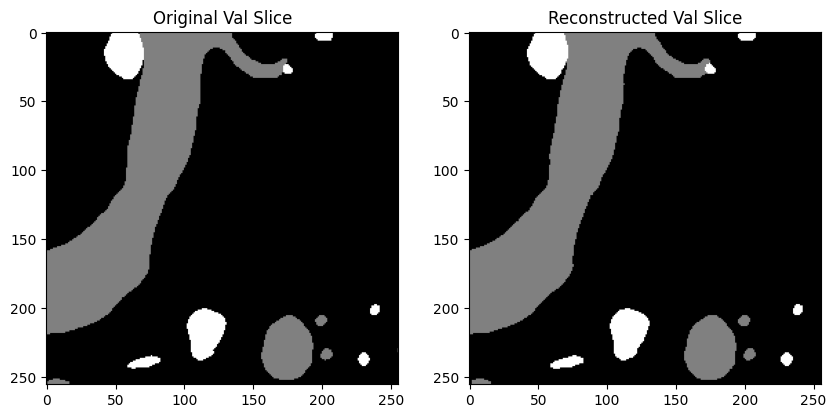

Epoch 250:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00188]        

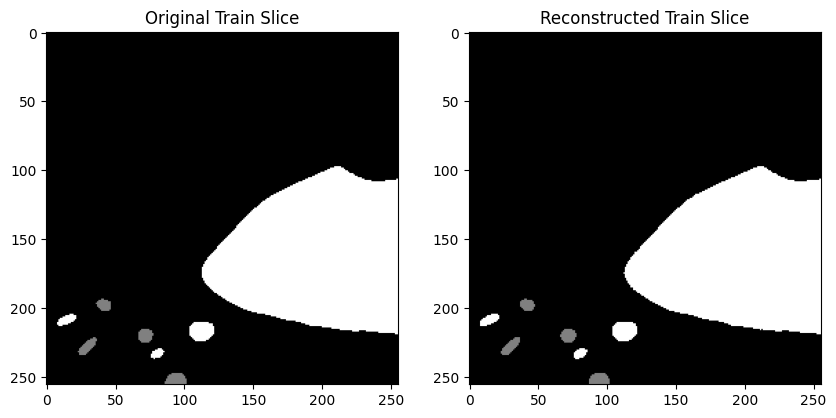

Epoch 250: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00188]

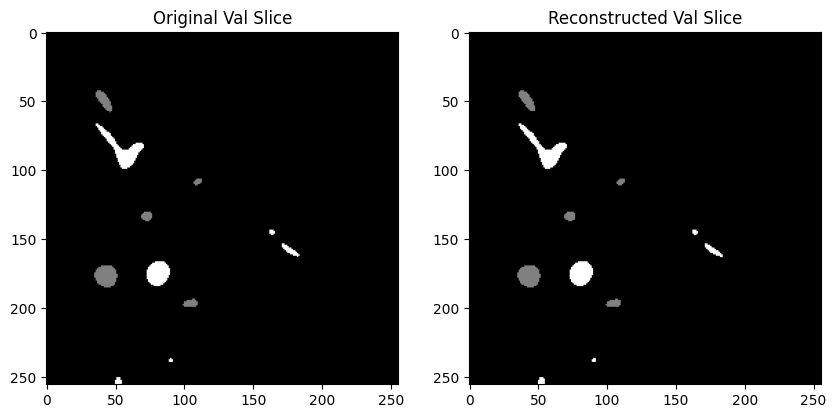

Epoch 260:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00209]        

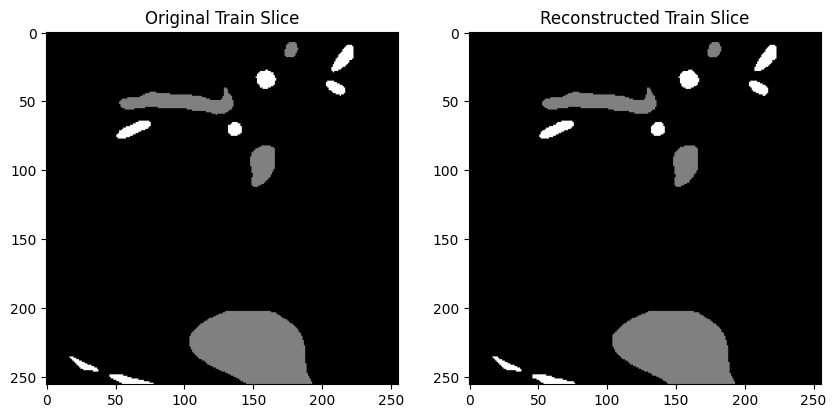

Epoch 260: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00209]

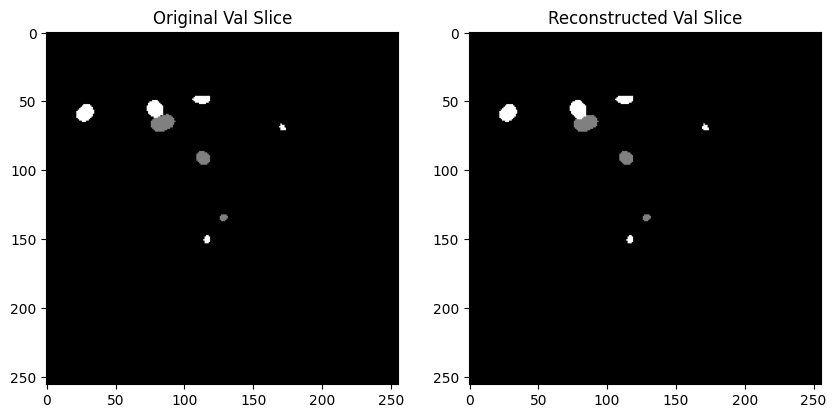

Epoch 270:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00172]        

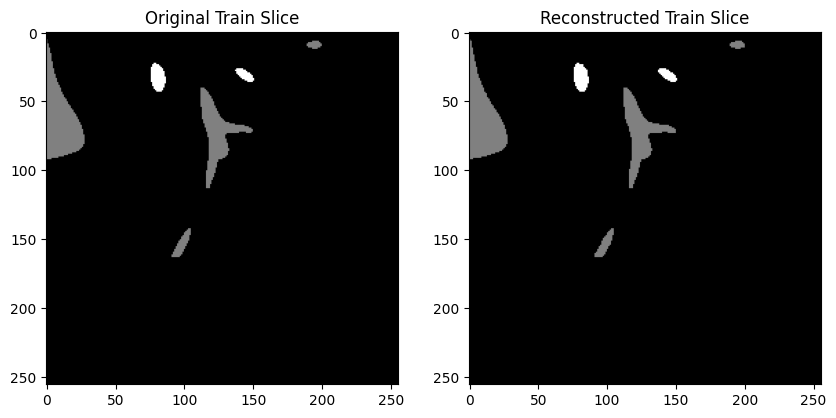

Epoch 270: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00172]

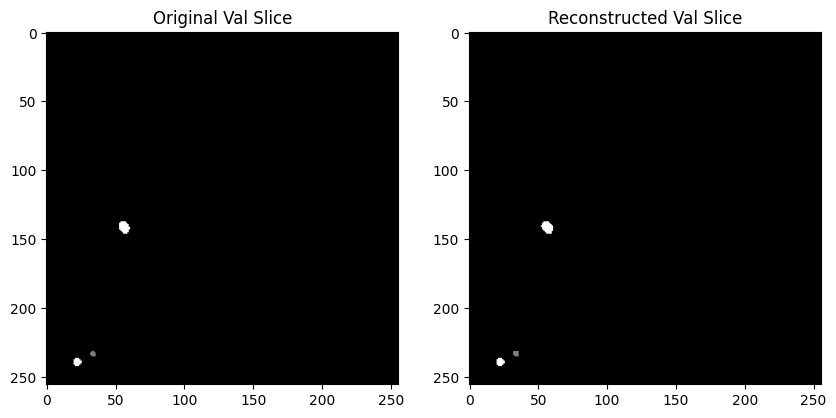

Epoch 280:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00183]        

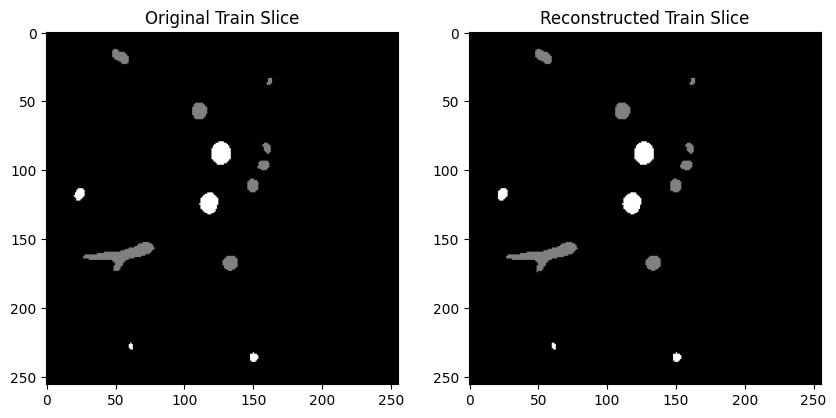

Epoch 280: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00183]

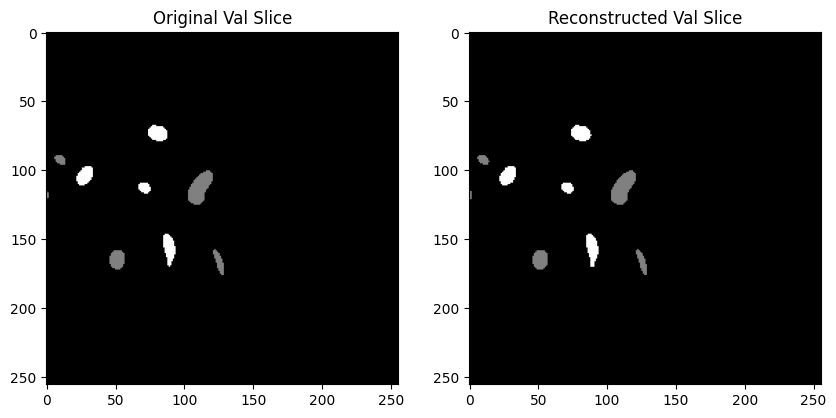

Epoch 290:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00769]        

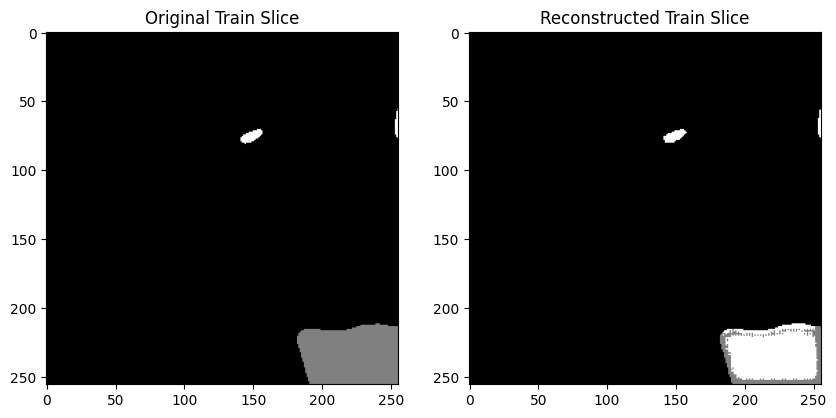

Epoch 290: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00769]

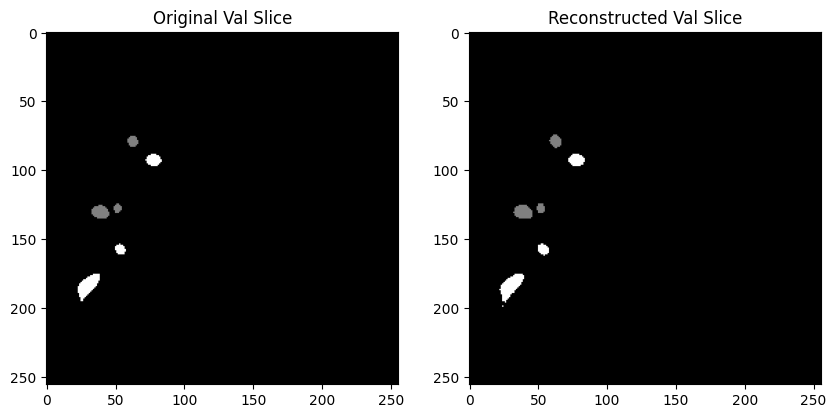

Epoch 300:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00374]        

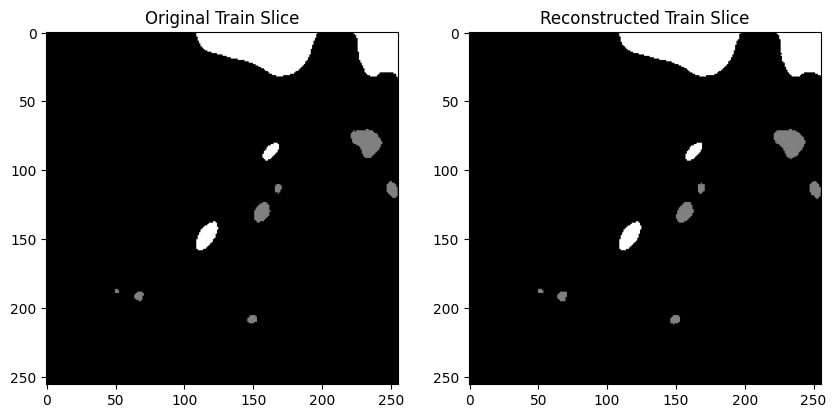

Epoch 300: 100%|██████████| 8/8 [00:17<00:00,  0.47it/s, v_num=0, val_loss=0.00374]

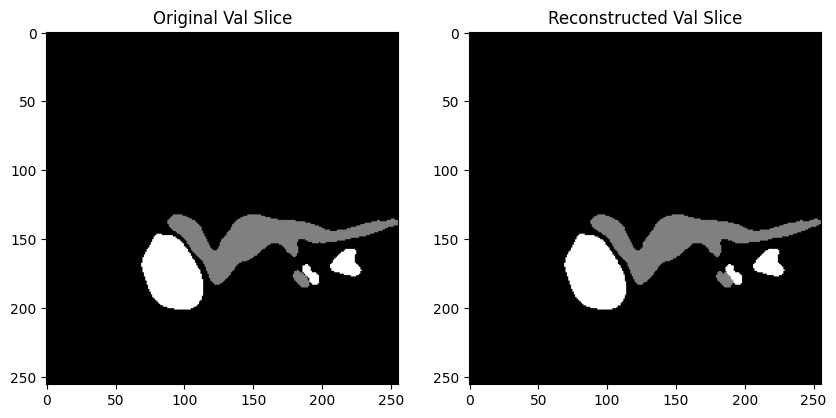

Epoch 310:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00224]        

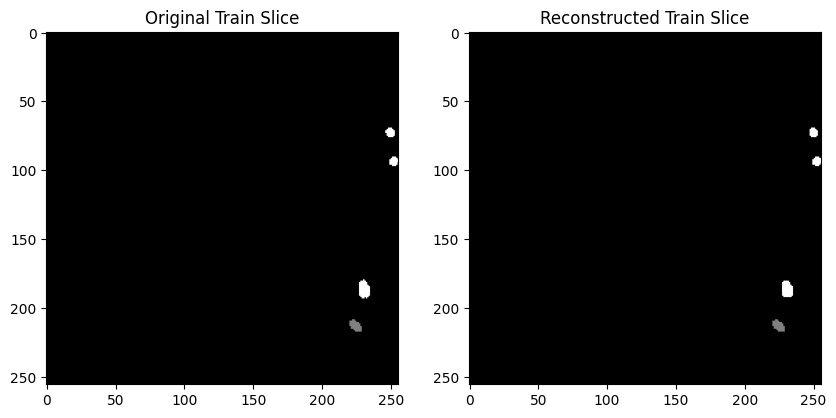

Epoch 310: 100%|██████████| 8/8 [00:16<00:00,  0.49it/s, v_num=0, val_loss=0.00224]

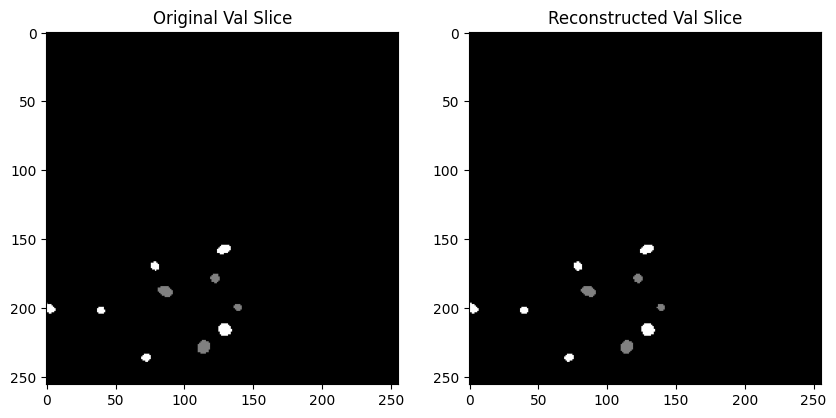

Epoch 320:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00309]        

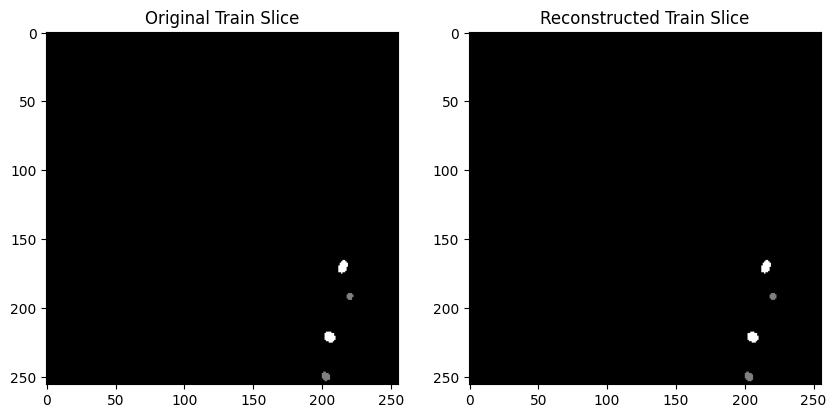

Epoch 320: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00309]

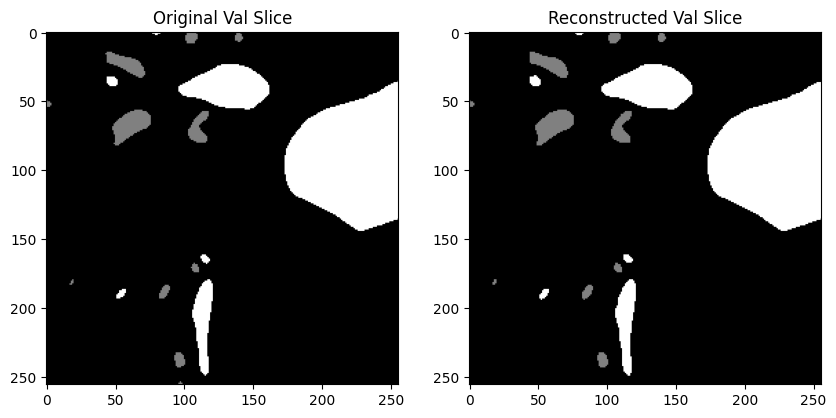

Epoch 330:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00216]        

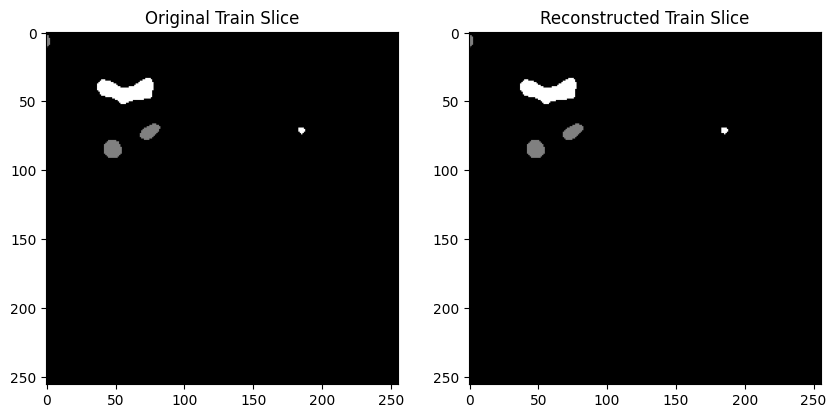

Epoch 330: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00216]

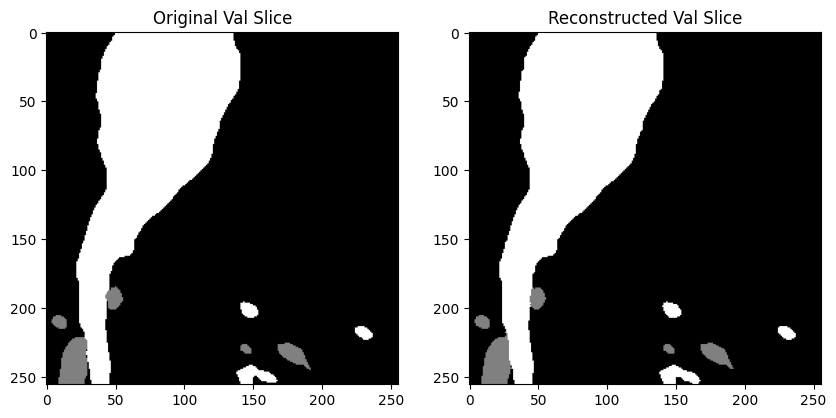

Epoch 340:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00186]        

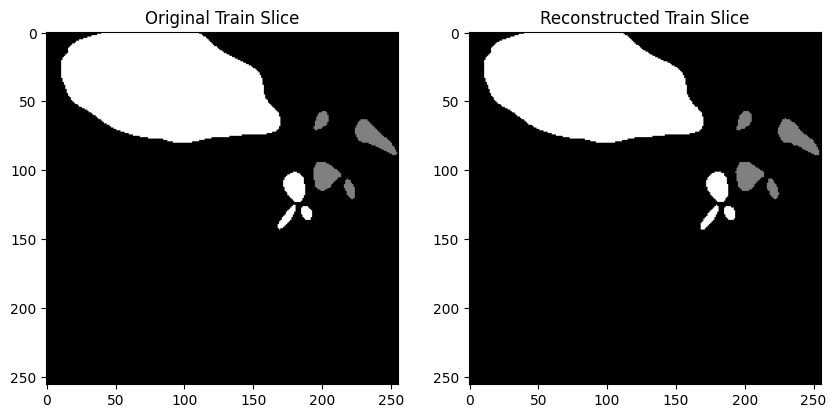

Epoch 340: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00186]

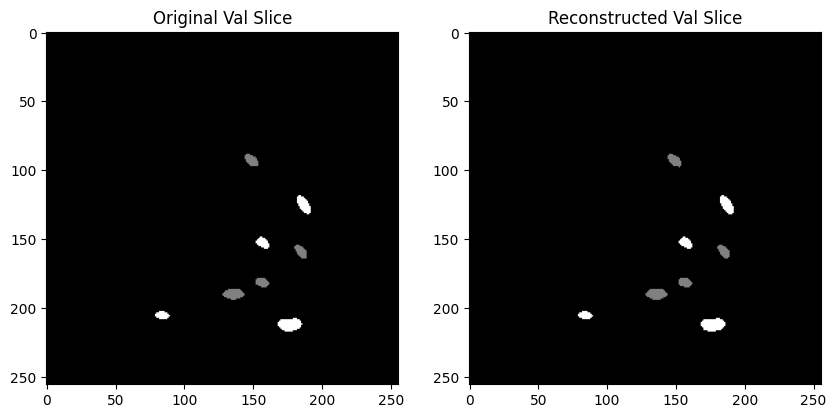

Epoch 350:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00161]        

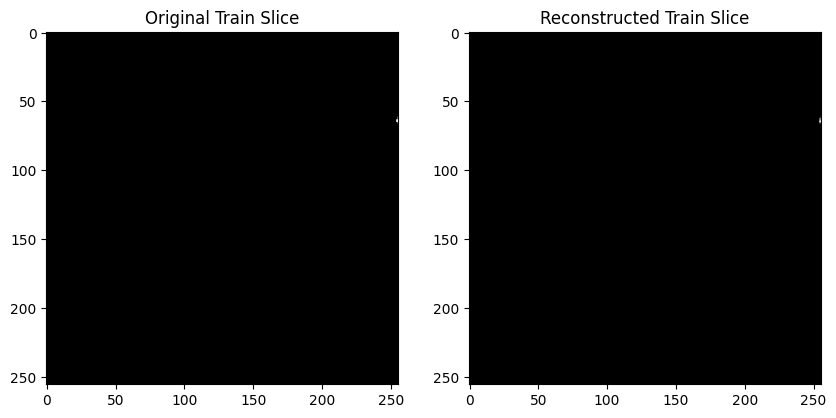

Epoch 350: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.00161]

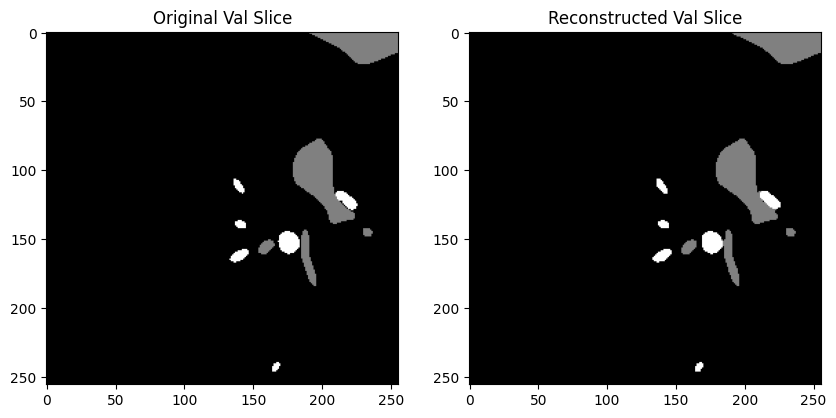

Epoch 360:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0016]         

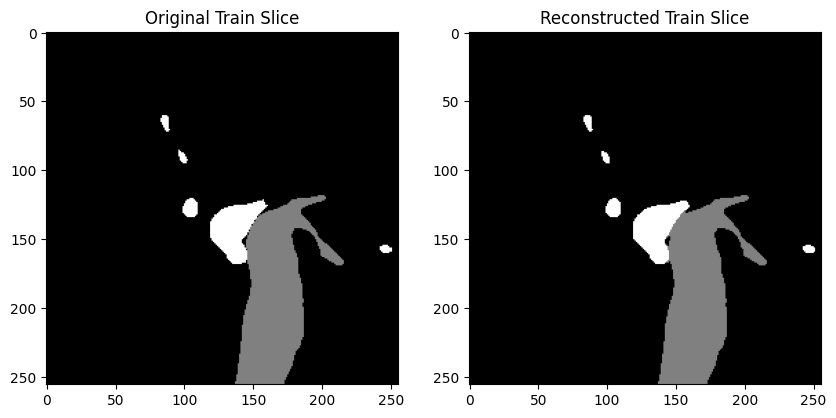

Epoch 360: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.0016]

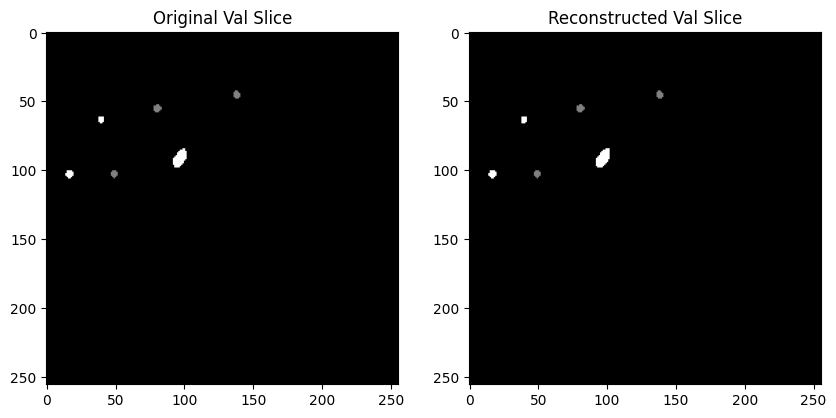

Epoch 370:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00139]        

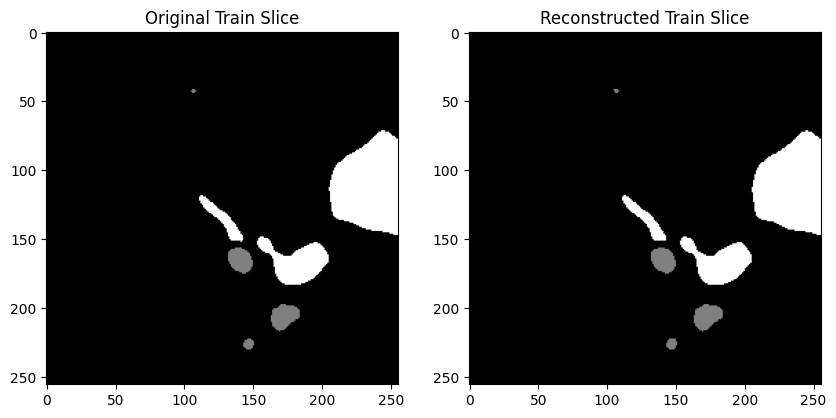

Epoch 370: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00139]

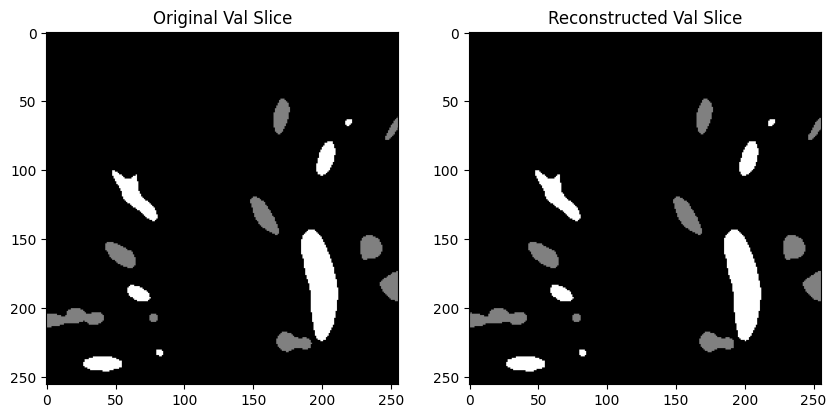

Epoch 380:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00156]        

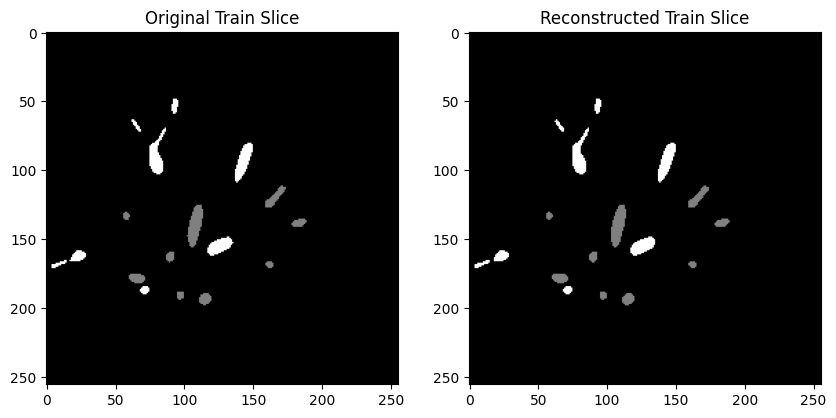

Epoch 380: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.00156]

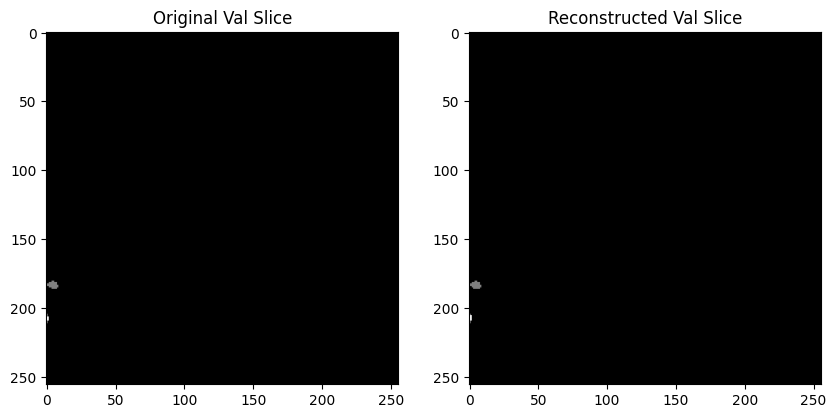

Epoch 390:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00148]        

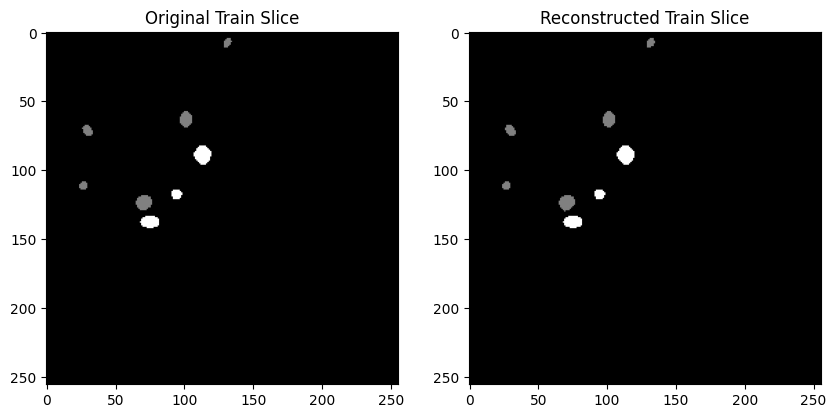

Epoch 390: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00148]

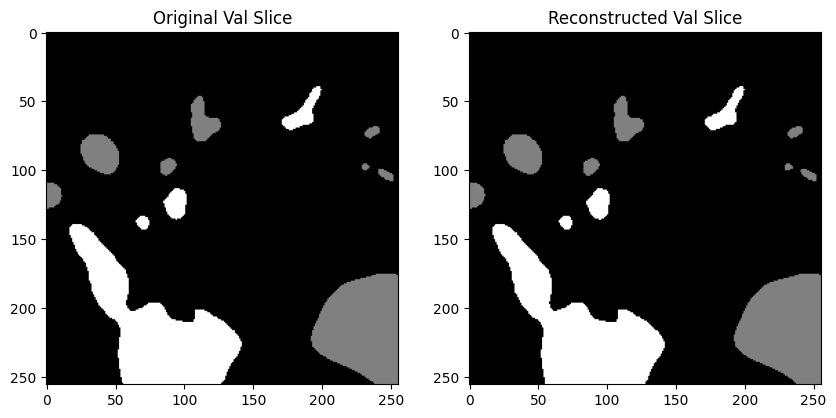

Epoch 400:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00136]        

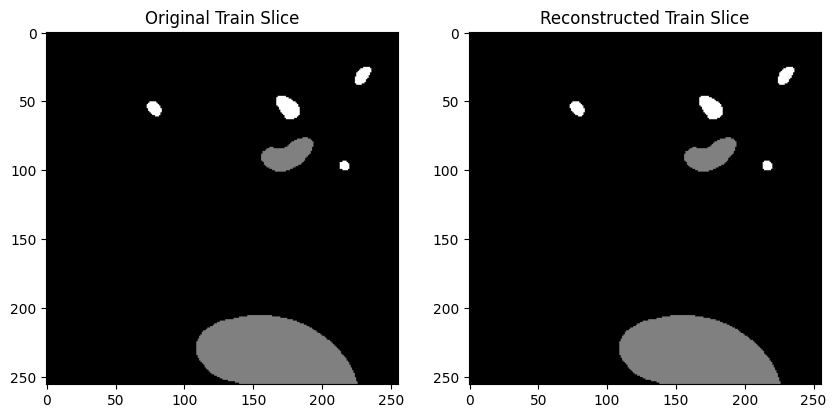

Epoch 400: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00136]

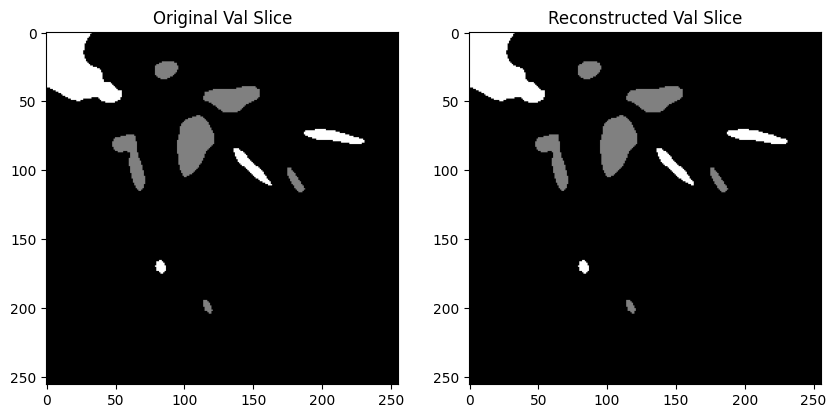

Epoch 410:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.0015]         

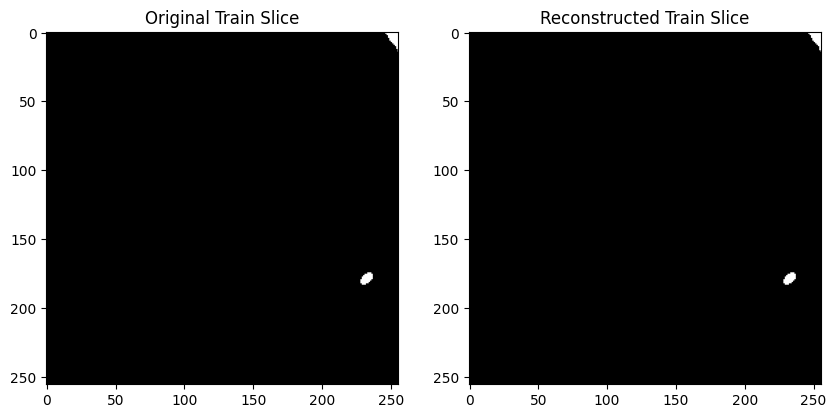

Epoch 410: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.0015]

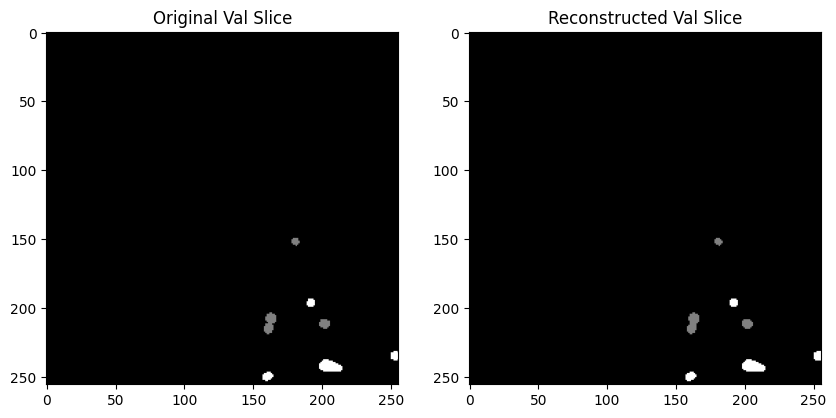

Epoch 420:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00131]        

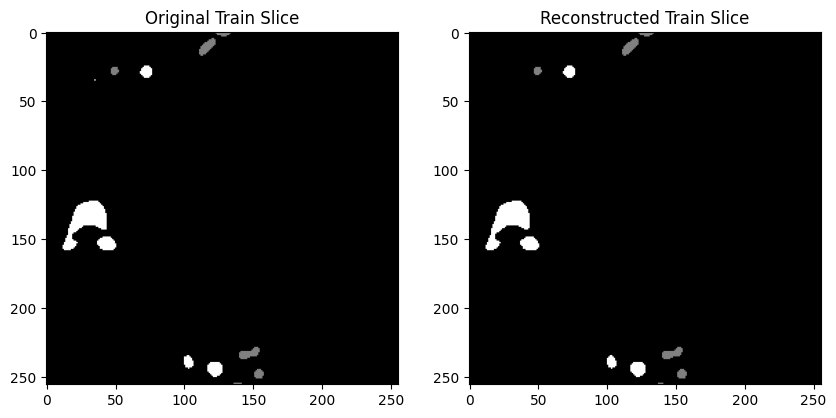

Epoch 420: 100%|██████████| 8/8 [00:16<00:00,  0.49it/s, v_num=0, val_loss=0.00131]

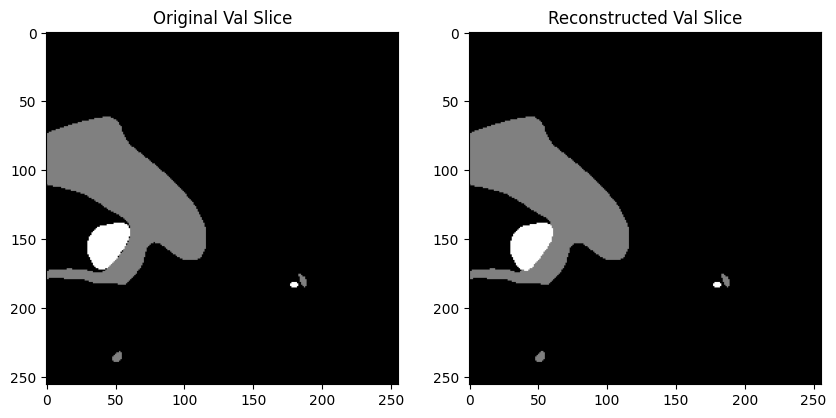

Epoch 430:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.001]           

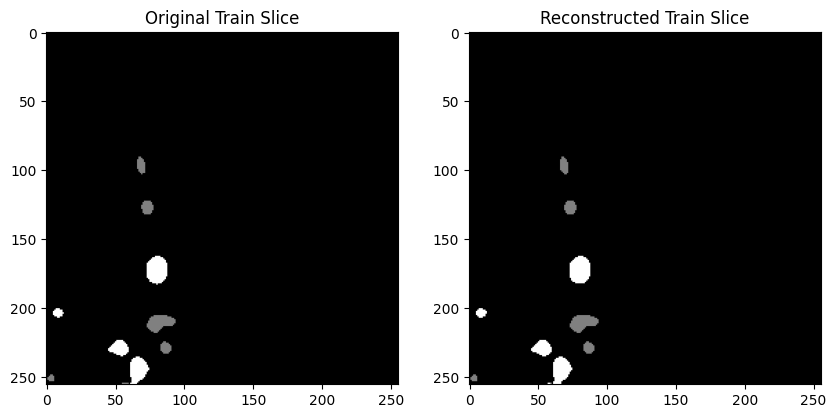

Epoch 430: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.001]

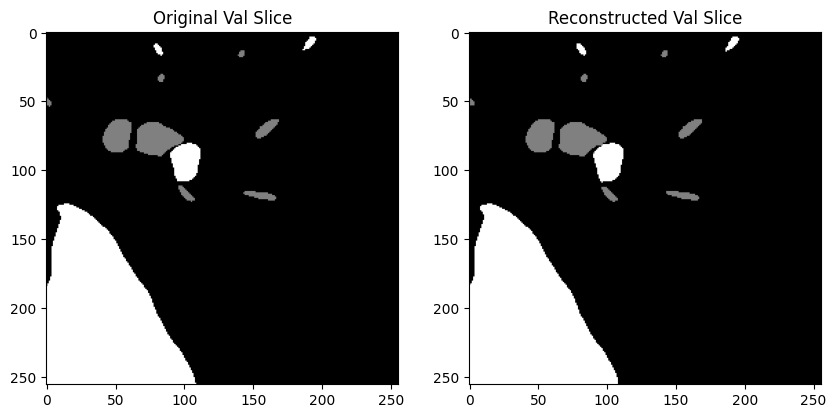

Epoch 440:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00117]         

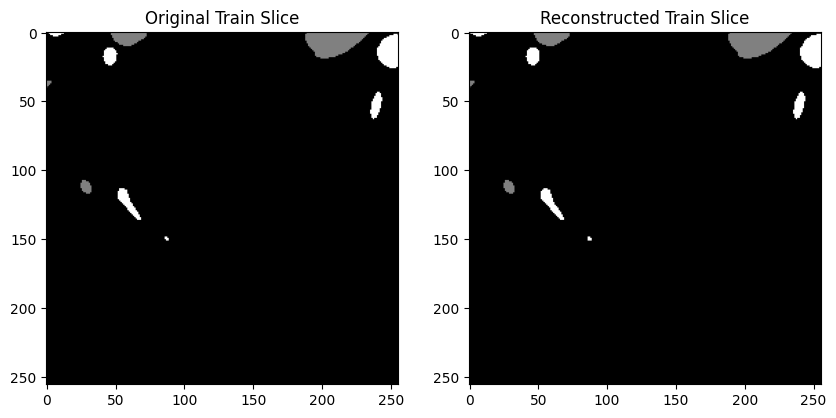

Epoch 440: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00117]

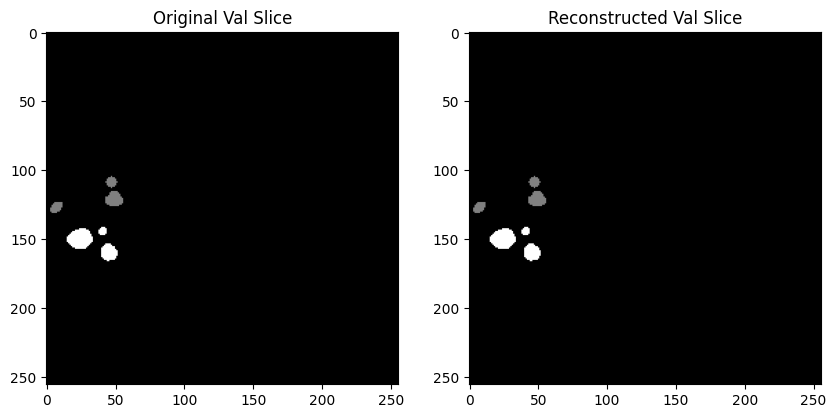

Epoch 450:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00112]         

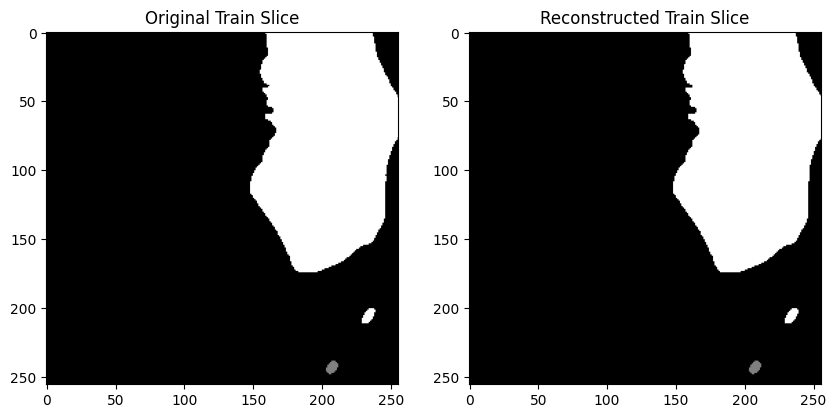

Epoch 450: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.00112]

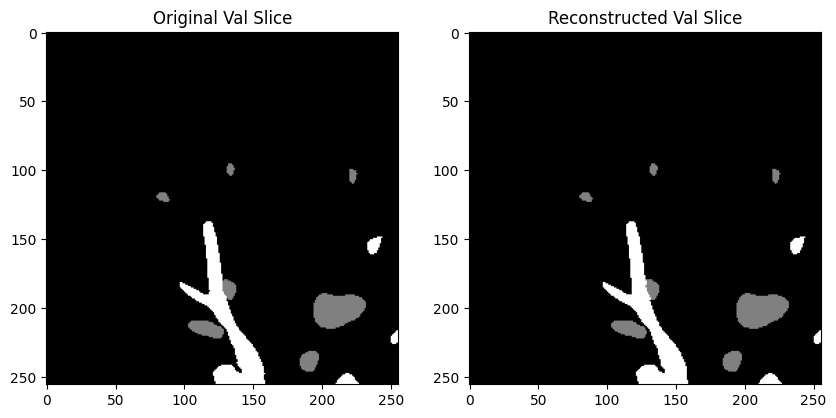

Epoch 460:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.000985]        

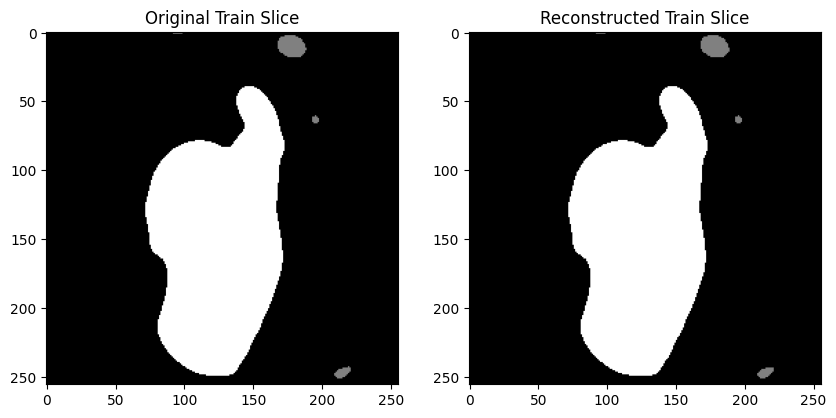

Epoch 460: 100%|██████████| 8/8 [00:16<00:00,  0.47it/s, v_num=0, val_loss=0.000985]

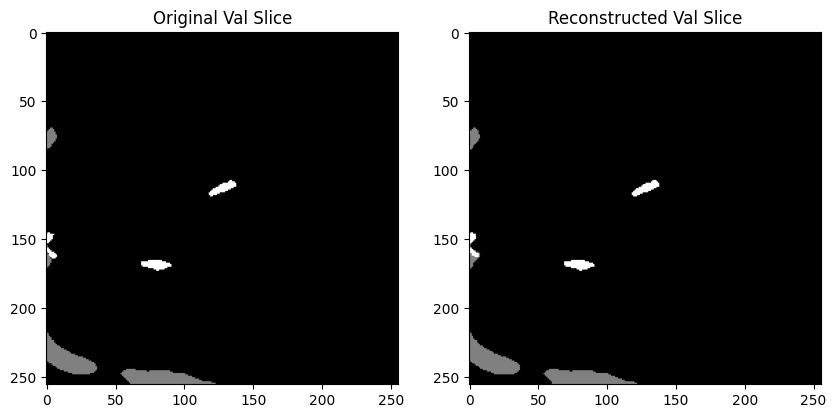

Epoch 470:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.000993]        

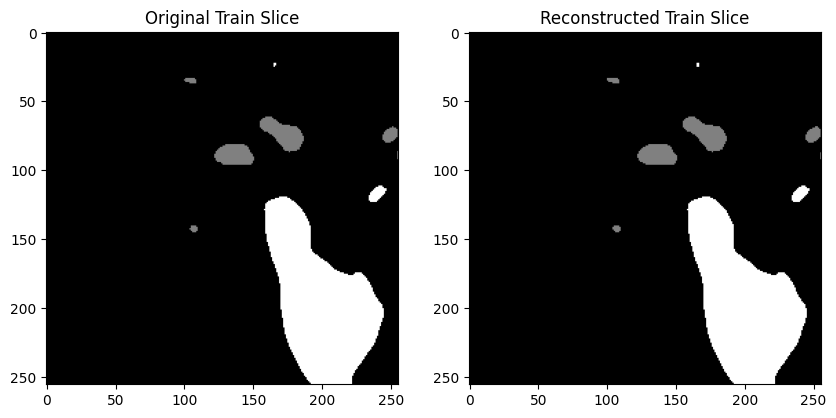

Epoch 470: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.000993]

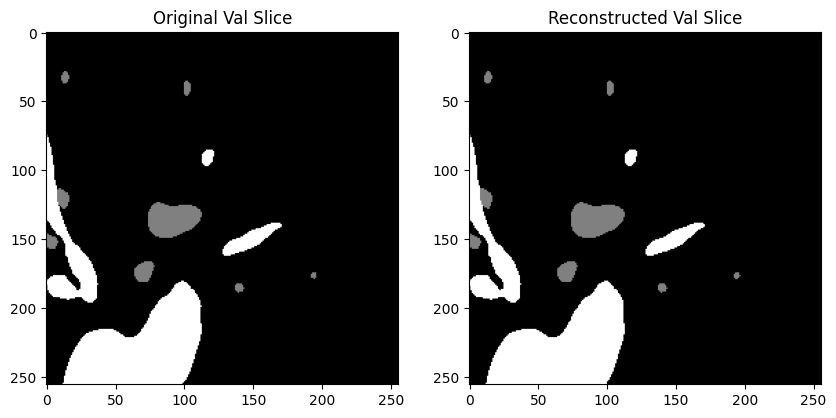

Epoch 480:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00384]         

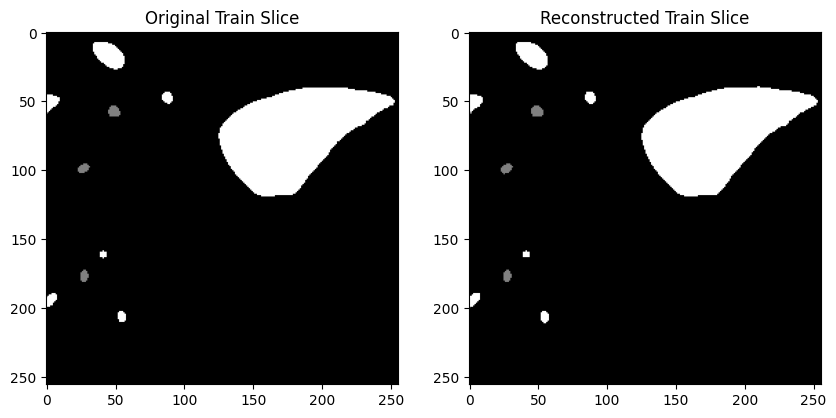

Epoch 480: 100%|██████████| 8/8 [00:16<00:00,  0.48it/s, v_num=0, val_loss=0.00384]

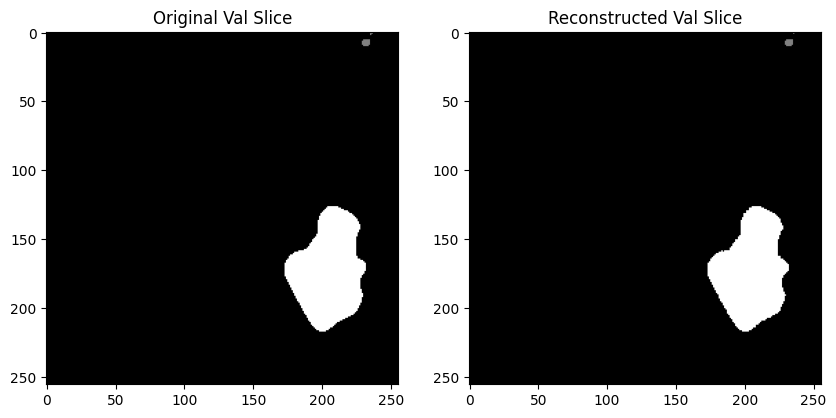

Epoch 490:   0%|          | 0/8 [00:00<?, ?it/s, v_num=0, val_loss=0.00179]        

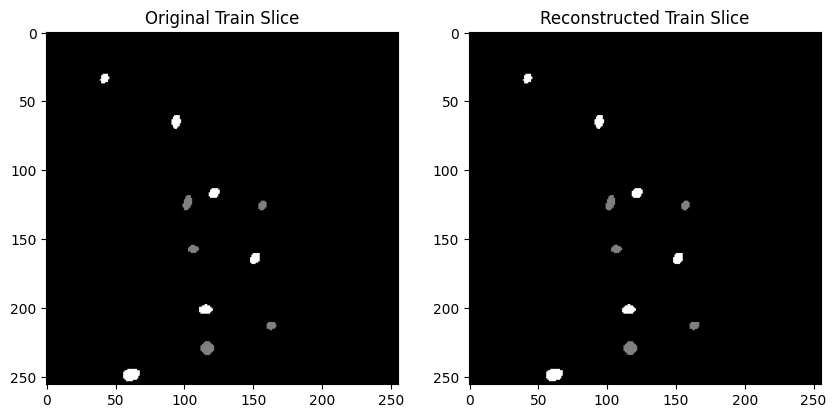

Epoch 490: 100%|██████████| 8/8 [00:17<00:00,  0.46it/s, v_num=0, val_loss=0.00179]

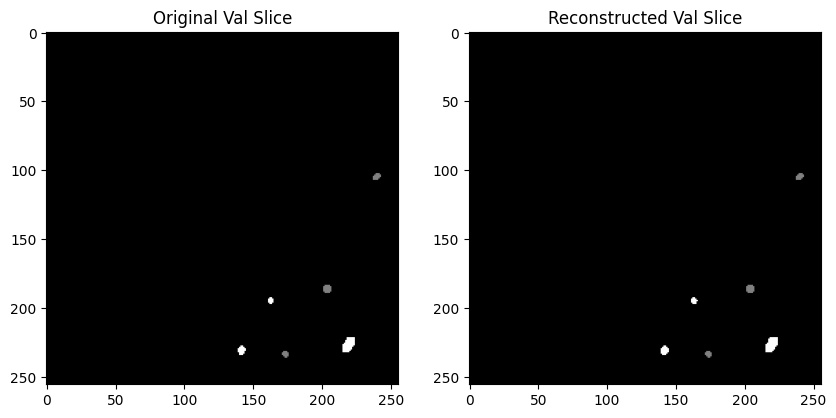

Epoch 499: 100%|██████████| 8/8 [00:50<00:00,  0.16it/s, v_num=0, val_loss=0.00125]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 499: 100%|██████████| 8/8 [00:50<00:00,  0.16it/s, v_num=0, val_loss=0.00125]


FIT Profiler Report

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  332098         

In [23]:
#every n epochs, show original image and its reconstruction 
import matplotlib.pyplot as plt 
class AutoEncoder(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.unet = UNet(
            spatial_dims=3,
            in_channels=1,
            out_channels=3,  # Update to 3 output channels
            channels=(16, 32, 64, 128, 256),
            strides=(2, 2, 2, 2),
            num_res_units=2,
        )
        # Define class weights
        class_weights = torch.tensor([0.2, 0.4, 0.4])
        self.loss_function = CrossEntropyLoss(weight=class_weights)

    def forward(self, x):
        return self.unet(x)


    def training_step(self, batch, batch_idx):
        x, y = batch
        x_hat = self.unet(x)
        loss = self.loss_function(x_hat, y.squeeze(1).long())  # Ensure labels are in the range [0, 2]
        self.log('train_loss', loss)

        # Reconstruct and display a single slice from the first training image every other epoch
        if self.current_epoch % 10 == 0 and batch_idx == 0:
            original_slice = x[0, 0, :, :, 128].detach().cpu().numpy()  # Select a single slice from the 3D volume
            reconstruction_slice = np.argmax(x_hat[0,:,:,:,128], axis=0) # Select a single slice from the 3D reconstruction

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(original_slice, cmap='gray')
            plt.title('Original Train Slice')
            plt.subplot(1, 2, 2)
            plt.imshow(reconstruction_slice, cmap='gray')
            plt.title('Reconstructed Train Slice')
            plt.show()

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        x_hat = self.unet(x)
        loss = self.loss_function(x_hat, y.squeeze(1).long())  # Ensure labels are in the range [0, 2]
        self.log('val_loss', loss, prog_bar=True)

        # Reconstruct and display a single slice from the first validation image every other epoch
        if self.current_epoch % 10 == 0 and batch_idx == 0:
            original_slice = x[0, 0, :, :, 128].detach().cpu().numpy()  # Select a single slice from the 3D volume
            #reconstruction_slice = self.unet(x[0].unsqueeze(0))[0, 0, :, :, 128].detach().cpu().numpy()  # Select a single slice from the 3D reconstruction
            reconstruction_slice = np.argmax(x_hat[0,:,:,:,128], axis=0)
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(original_slice, cmap='gray')
            plt.title('Original Val Slice')
            plt.subplot(1, 2, 2)
            plt.imshow(reconstruction_slice, cmap='gray')
            plt.title('Reconstructed Val Slice')
            plt.show()

        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)


# Define dataset and data loaders for both training and validation sets
train_data_dir = "./images/TrainFullLabels30"
val_data_dir = "./images/ValFullLabels70"

transform = Compose([
    Lambda(func=lambda x: np.expand_dims(x, 0) if x.ndim == 3 else x),
    RandSpatialCrop((256, 256, 256), random_size=False),
    RandRotate90(prob=0.5),
    ToTensor(dtype=torch.float32)
])

class MyDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.files = [f for f in os.listdir(data_dir) if f.endswith('.nrrd')]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_dir, self.files[idx])
        data, header = nrrd.read(file_path)
        if self.transform:
            data = self.transform(data)
        return data, data

train_dataset = MyDataset(train_data_dir, transform)
val_dataset = MyDataset(val_data_dir, transform)

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=True, num_workers=0)

# Define a custom callback to plot both training and validation losses

class PlotLossCallback(pl.Callback):
    def __init__(self, log_dir):
        super().__init__()
        self.log_dir = log_dir

    def on_train_start(self, trainer, pl_module):
        # Clear previous graphs
        tf.compat.v1.reset_default_graph()
        self.writer = SummaryWriter(self.log_dir)

    def on_train_epoch_end(self, trainer, pl_module, **kwargs):
        epoch = trainer.current_epoch
        train_loss = trainer.callback_metrics['train_loss'].cpu().item()
        val_loss = trainer.callback_metrics['val_loss'].cpu().item()

        # Write both training and validation loss to the same graph with epoch as global step
        self.writer.add_scalars('Training and Validation Loss', {'training' : train_loss,
                                                                'validation' : val_loss }, global_step=epoch +1 )
    def on_train_end(self, trainer, pl_module):
        self.writer.close()

# Define Lightning trainer
trainer = pl.Trainer(
    max_epochs=500,
    callbacks=[PlotLossCallback("./logs/")],
    profiler='simple'
)

# Initialize model and start training
model = AutoEncoder()
trainer.fit(model, train_dataloader, val_dataloader)

In [30]:
torch.save(model.state_dict(), "./images/Model/model500.pth")

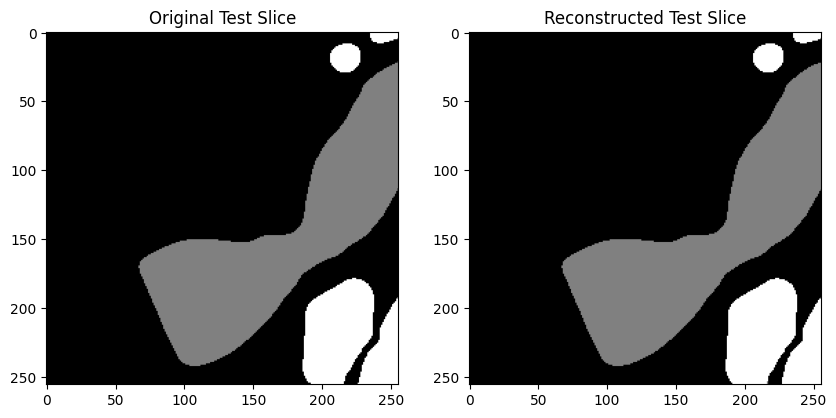

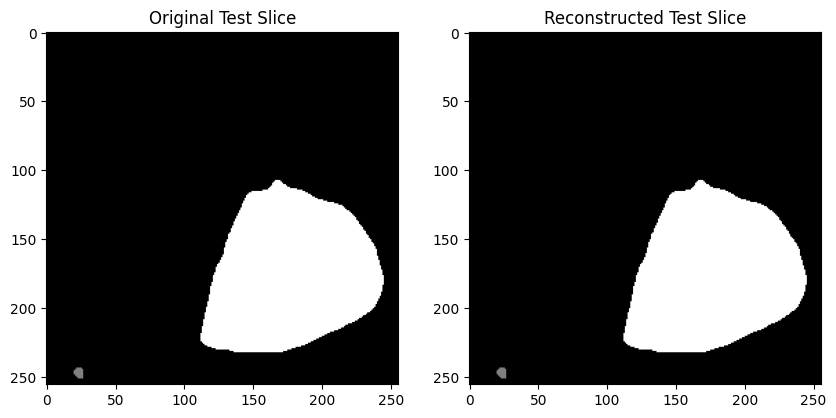

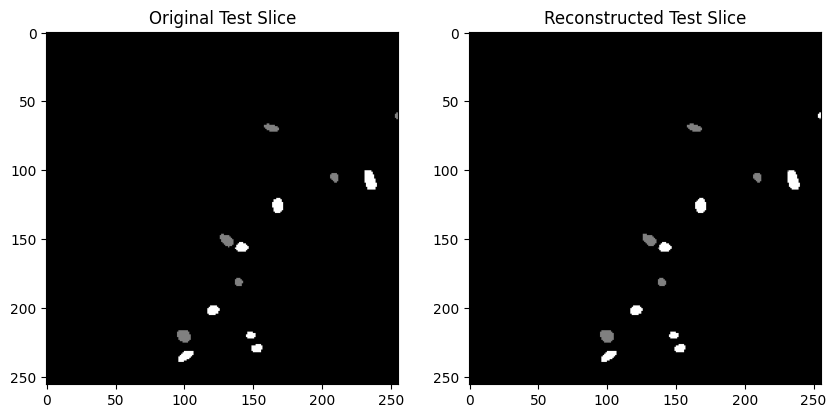

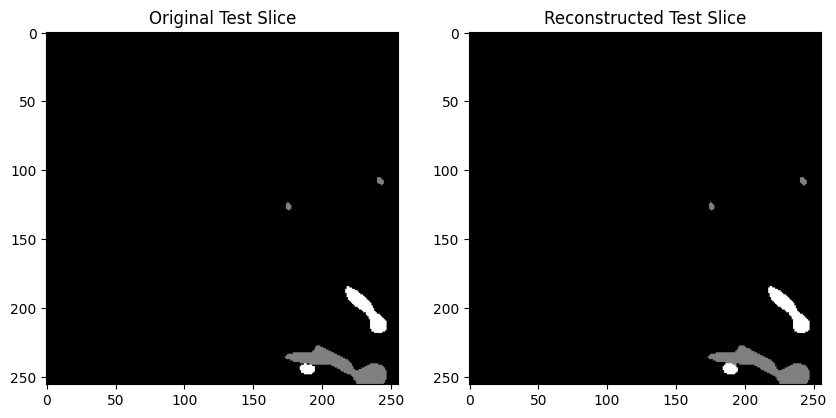

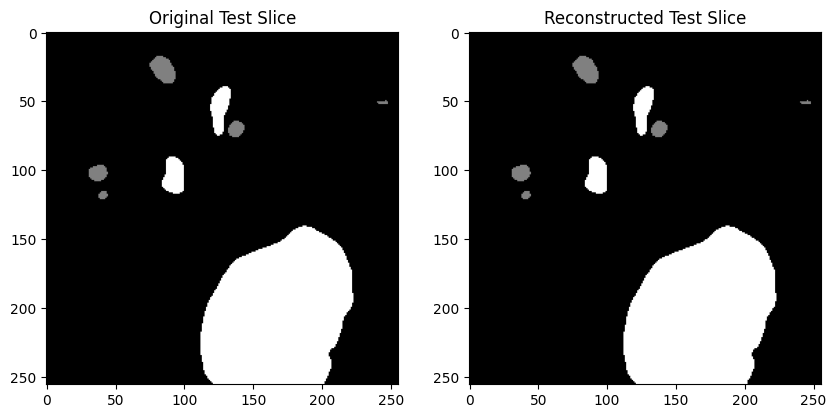

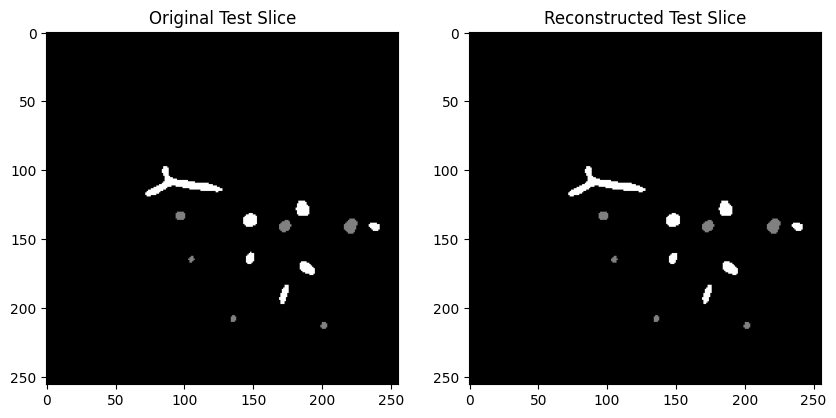

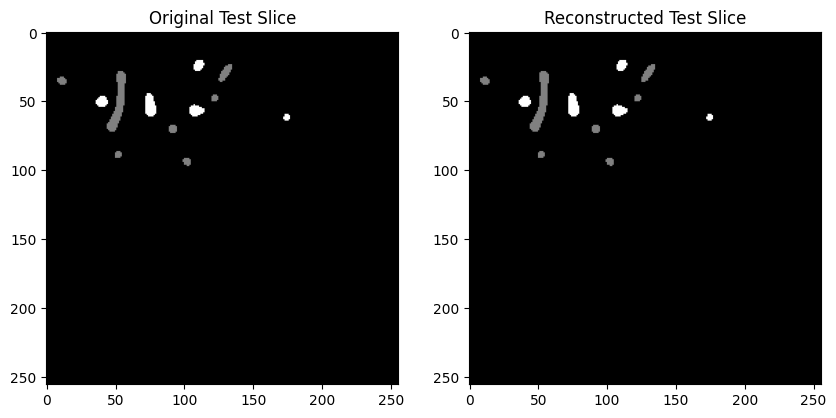

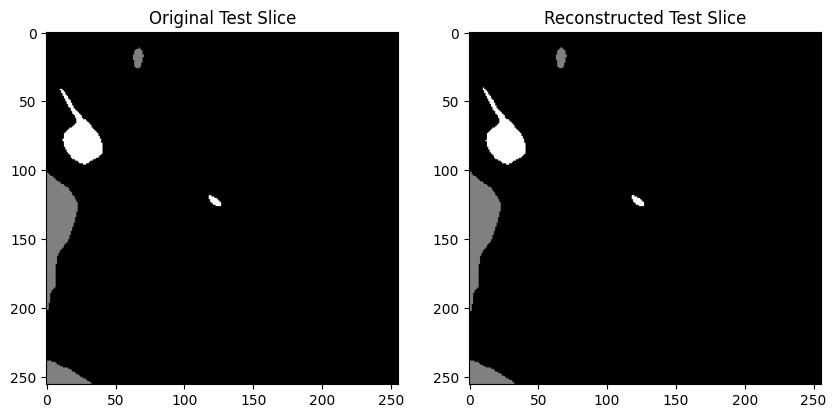

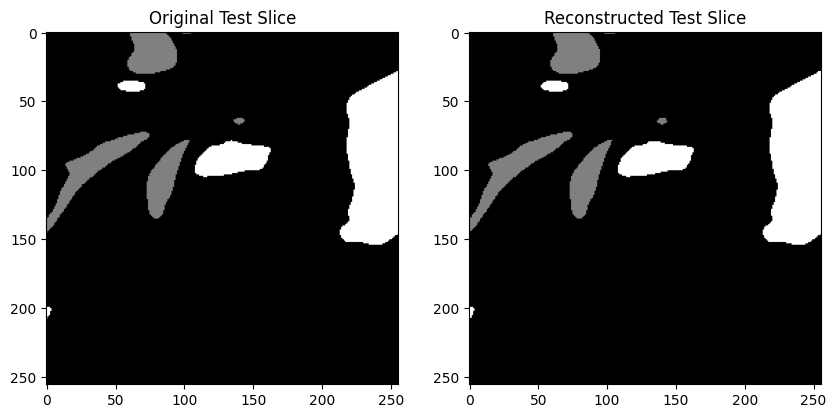

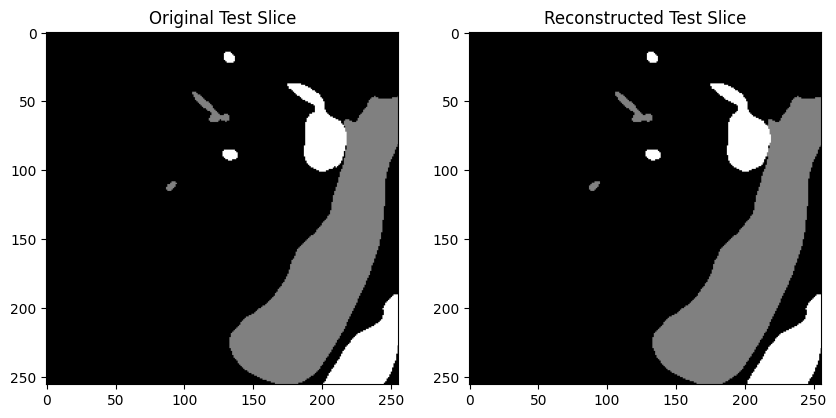

In [25]:
#Testing model

test_dir = "./images/Test"
test_data = MyDataset(test_dir, transform)
test_dataloader = DataLoader(test_data, batch_size = 1, shuffle= False)

model.eval()

with torch.no_grad():
    for batch_idx, (x,_) in enumerate(test_dataloader):
        x_hat = model(x)
        
        # Reconstruct and display a single slice from the first test image
        original_slice = x[0, 0, :, :, 128].detach().cpu().numpy() 
        reconstruction_slice = np.argmax(x_hat[0,:,:,:,128], axis=0)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_slice, cmap='gray')
        plt.title('Original Test Slice')
        plt.subplot(1, 2, 2)
        plt.imshow(reconstruction_slice, cmap='gray')
        plt.title('Reconstructed Test Slice')
        plt.show()

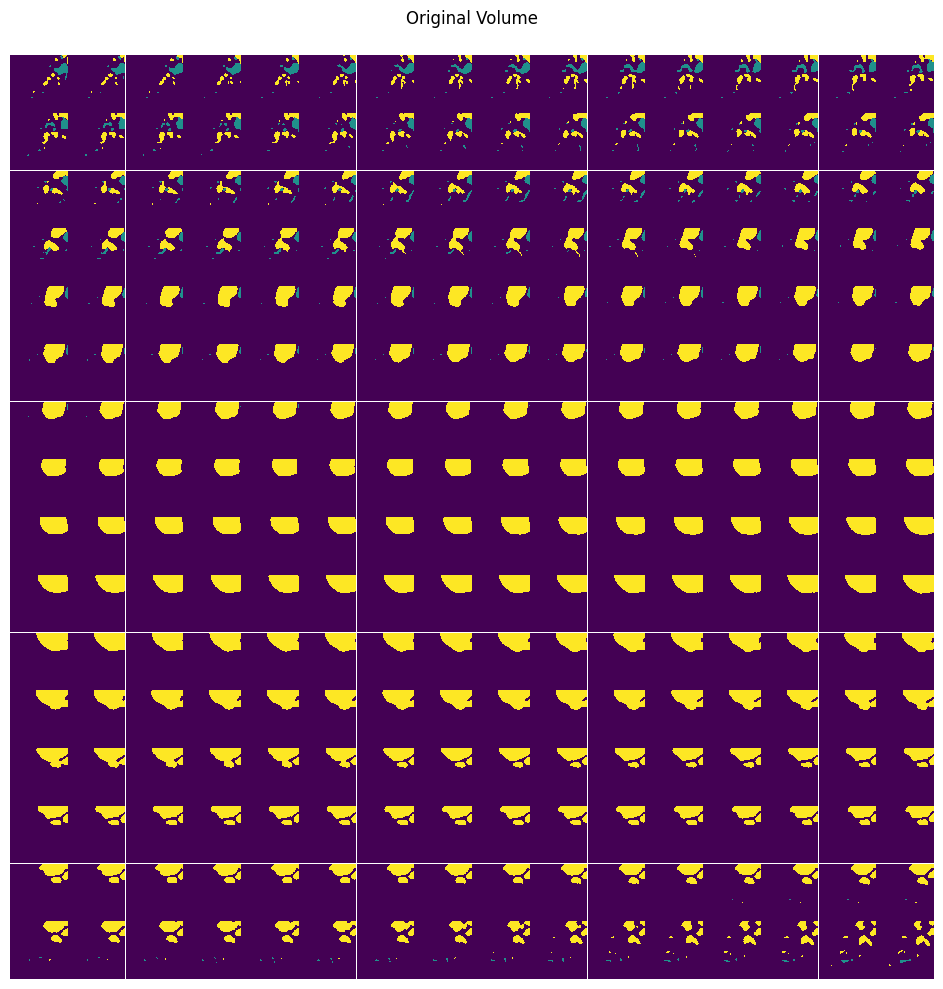

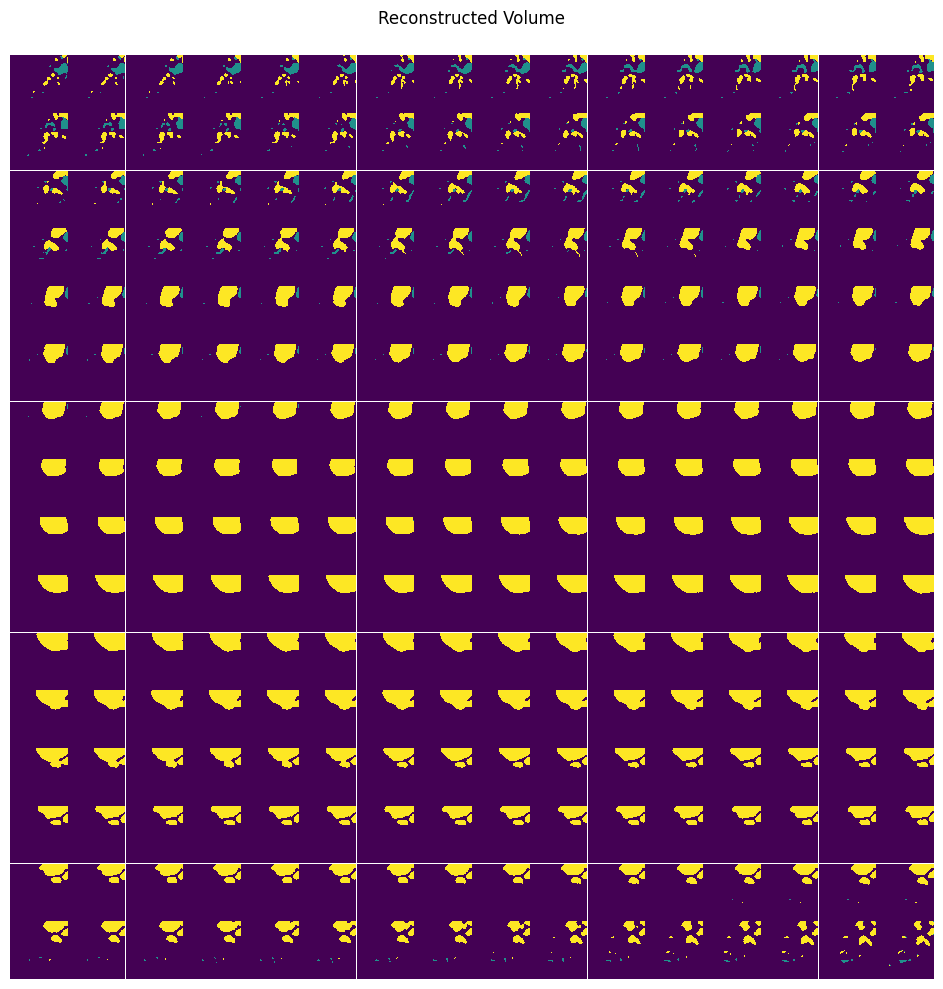

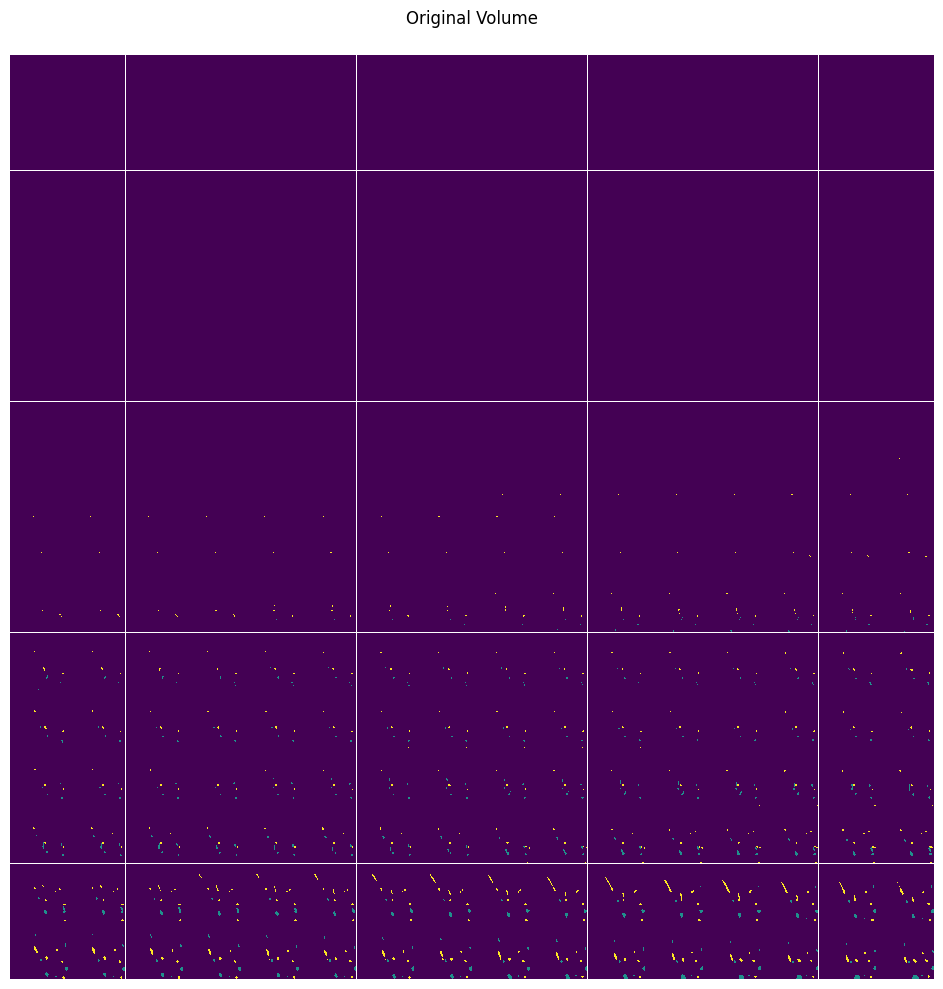

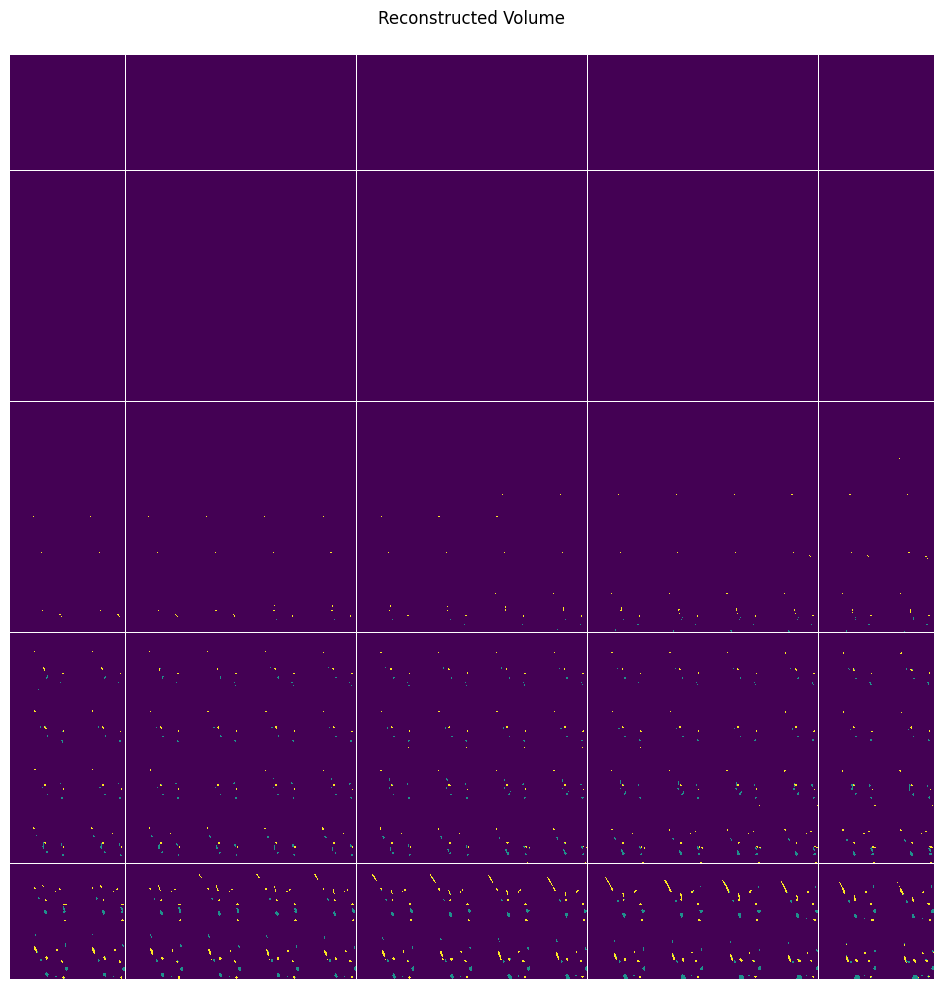

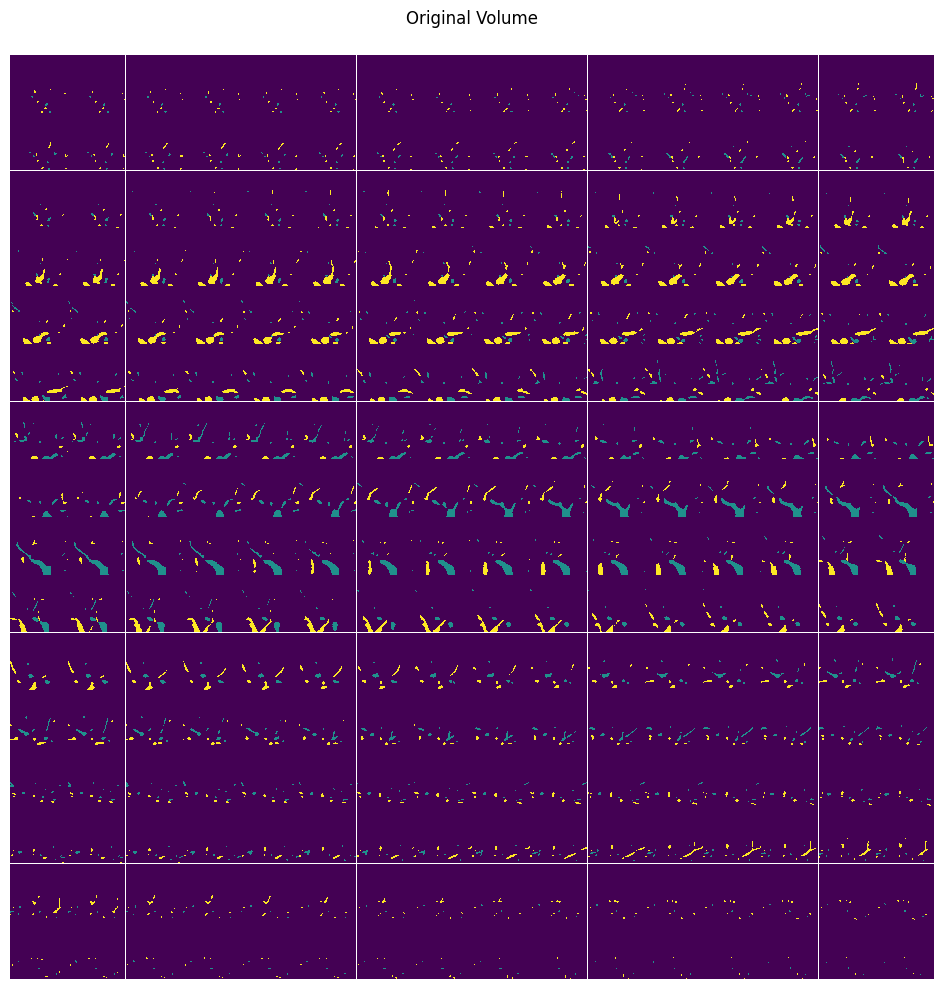

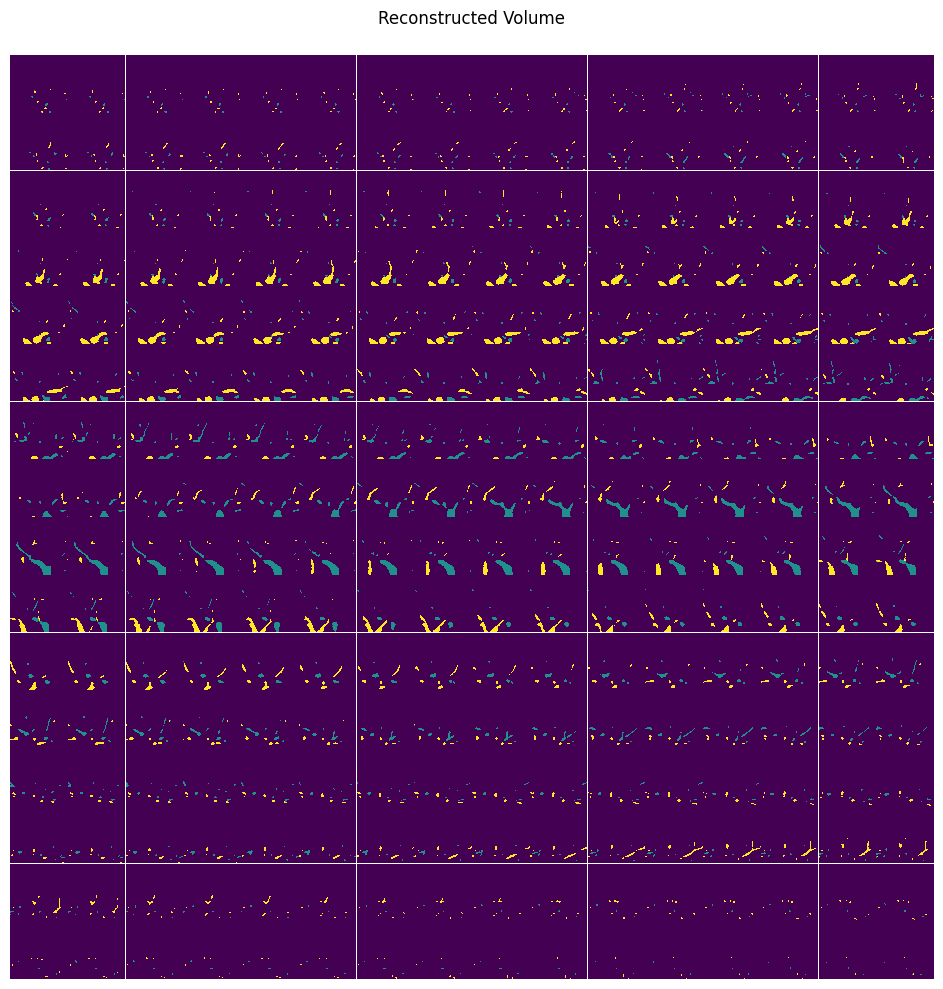

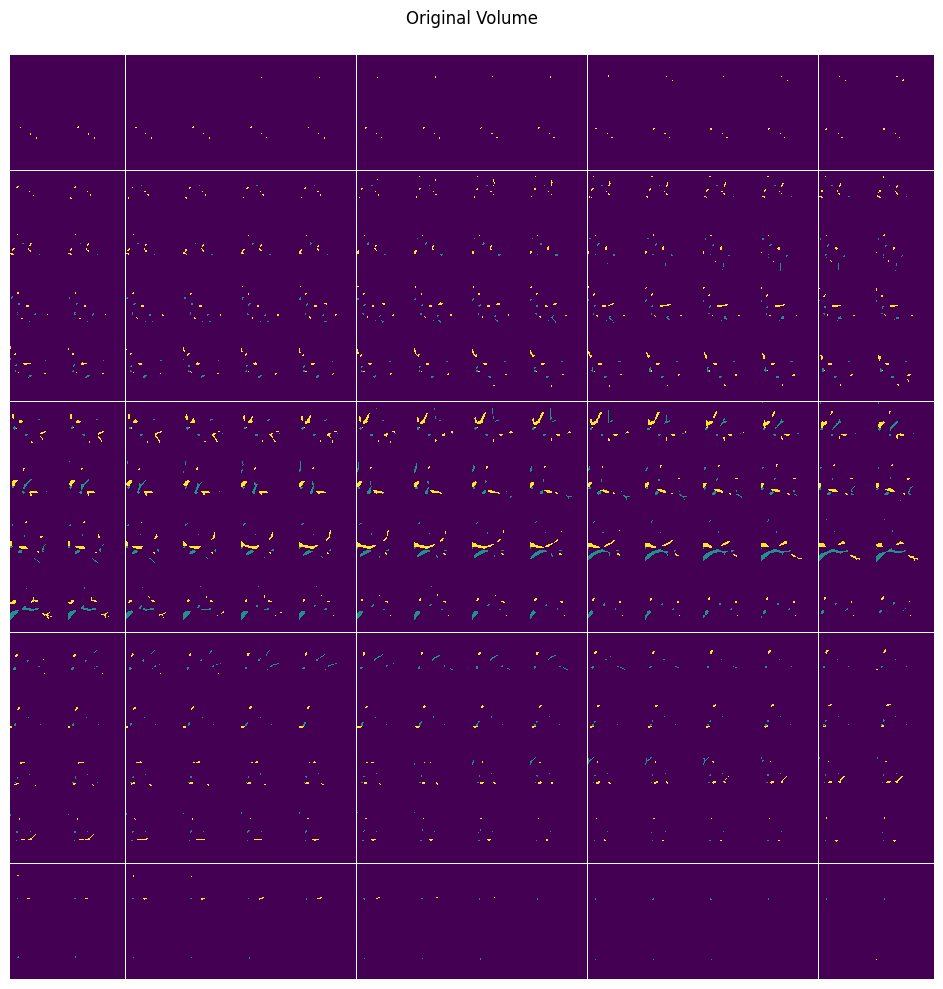

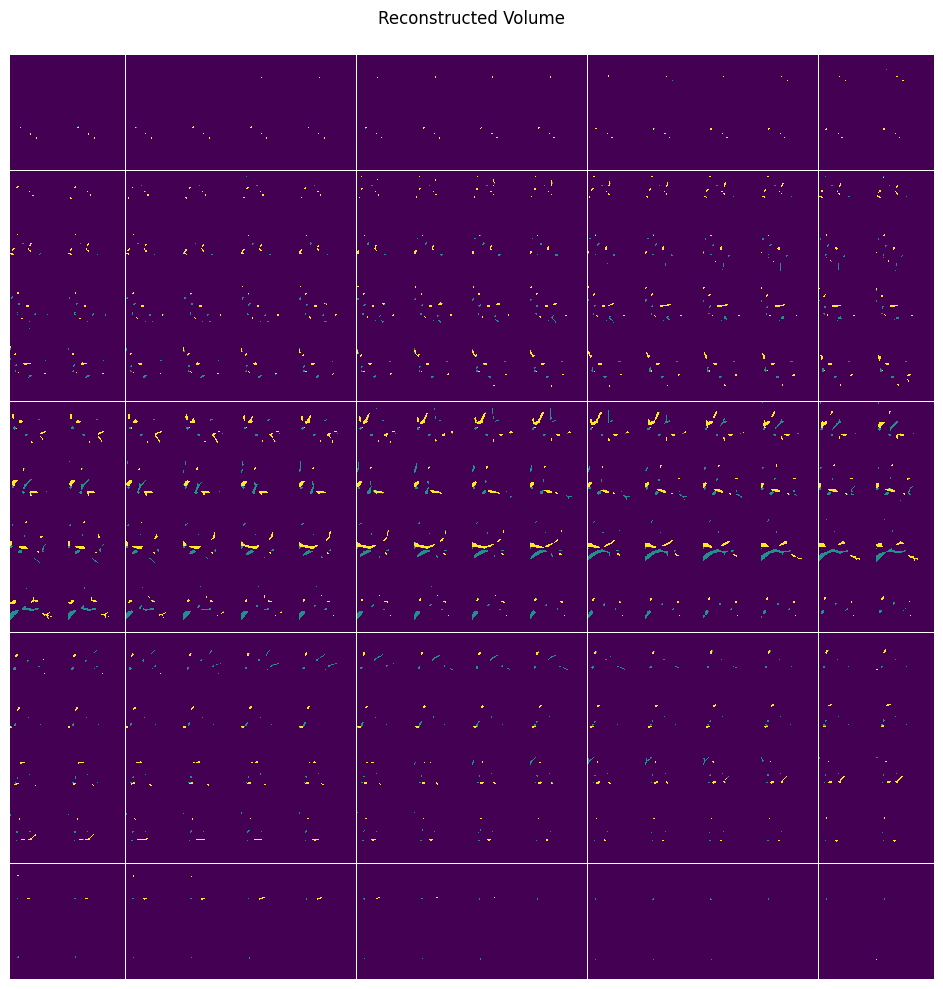

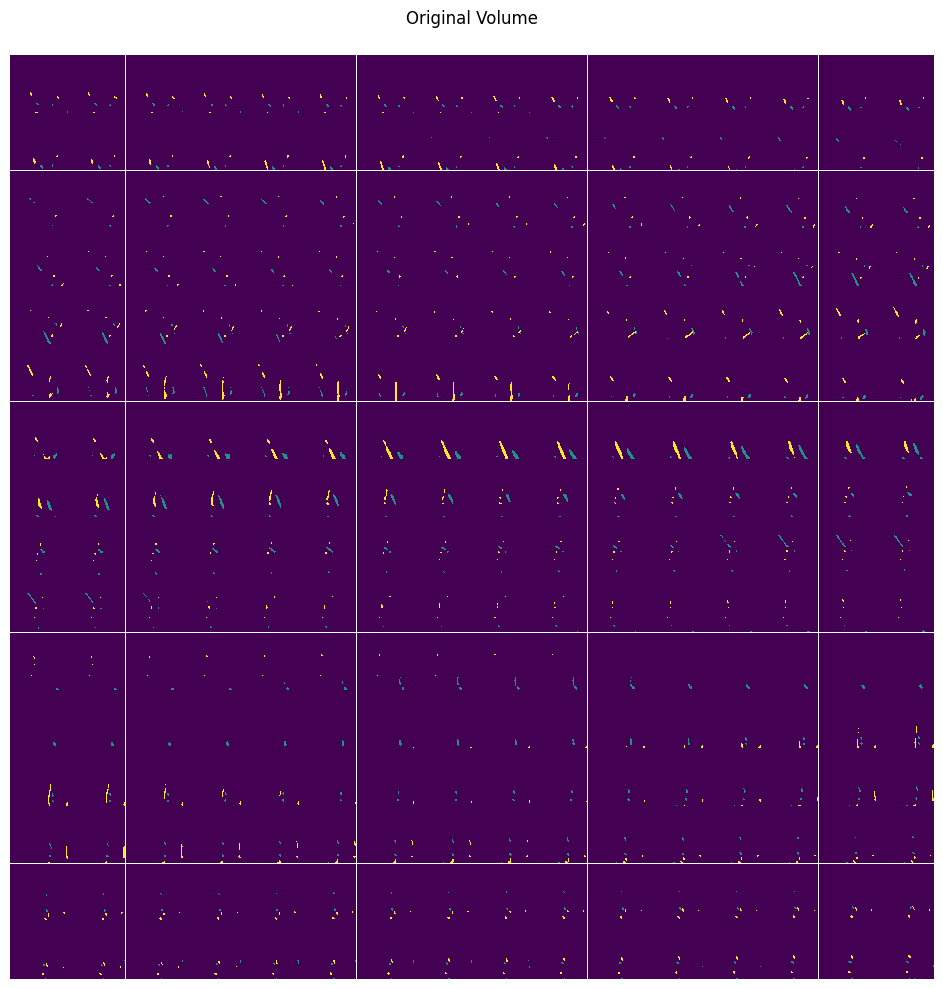

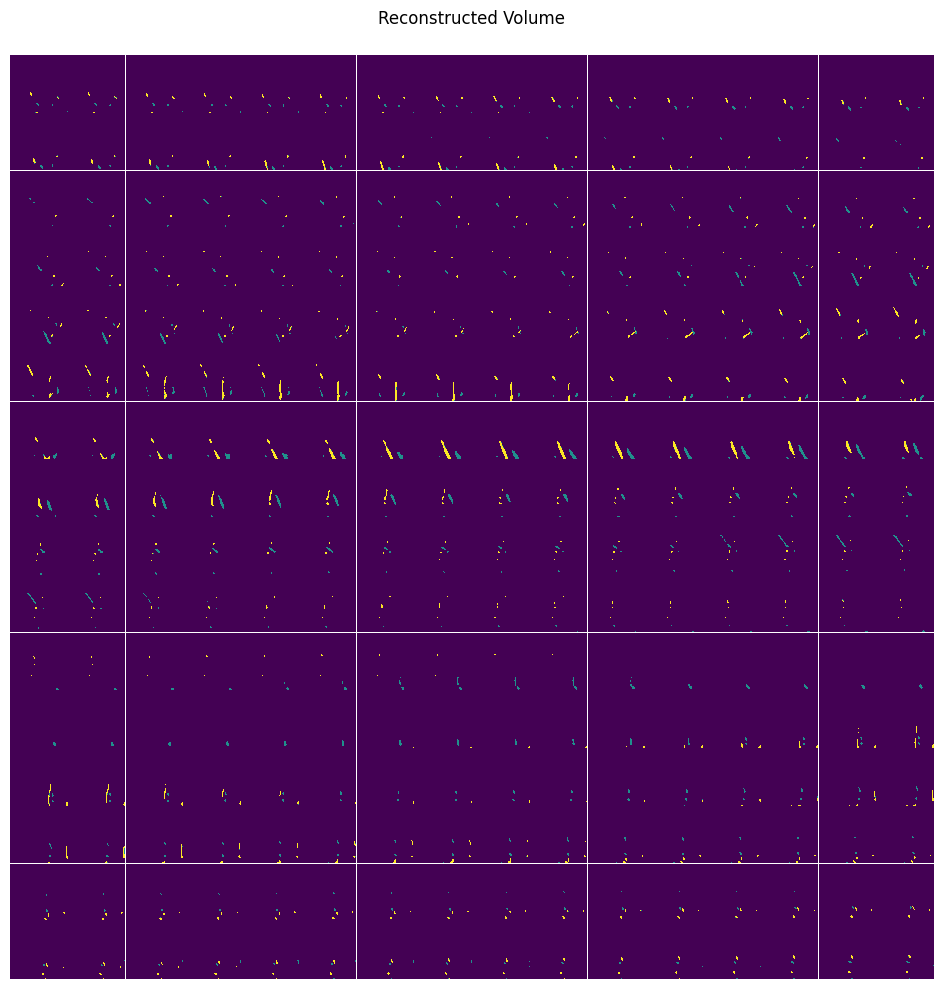

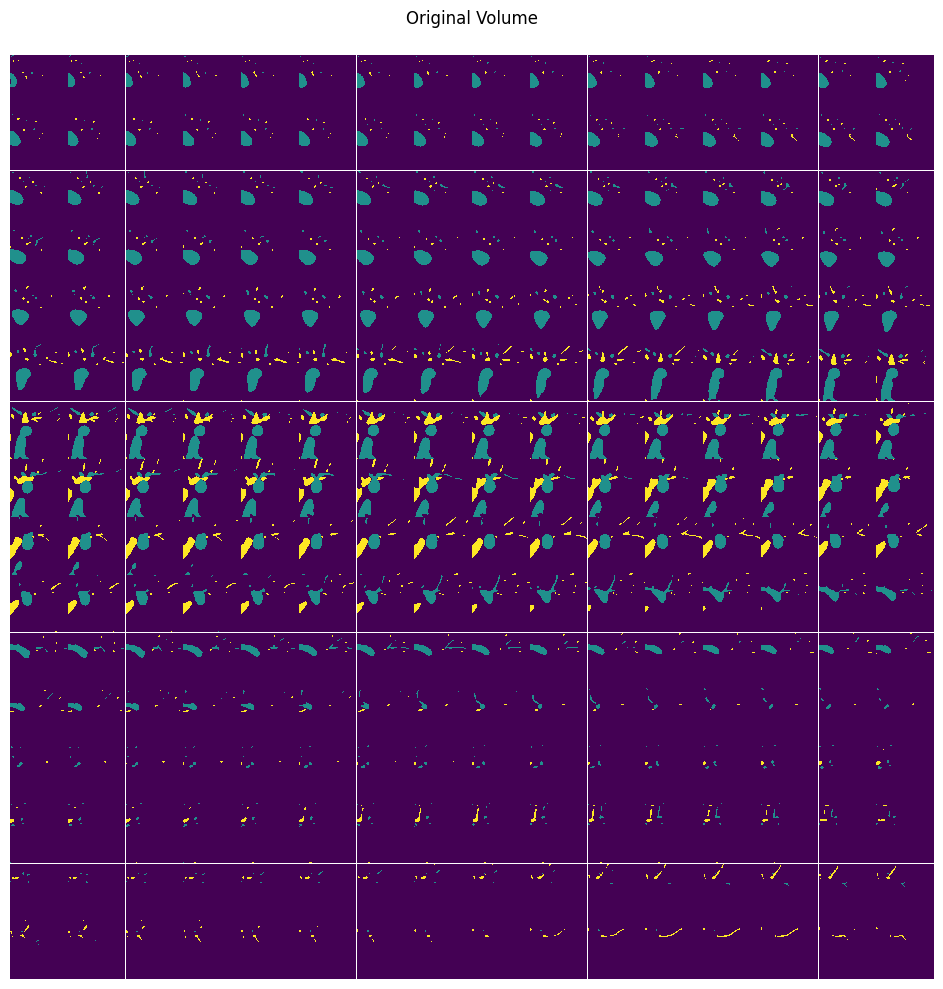

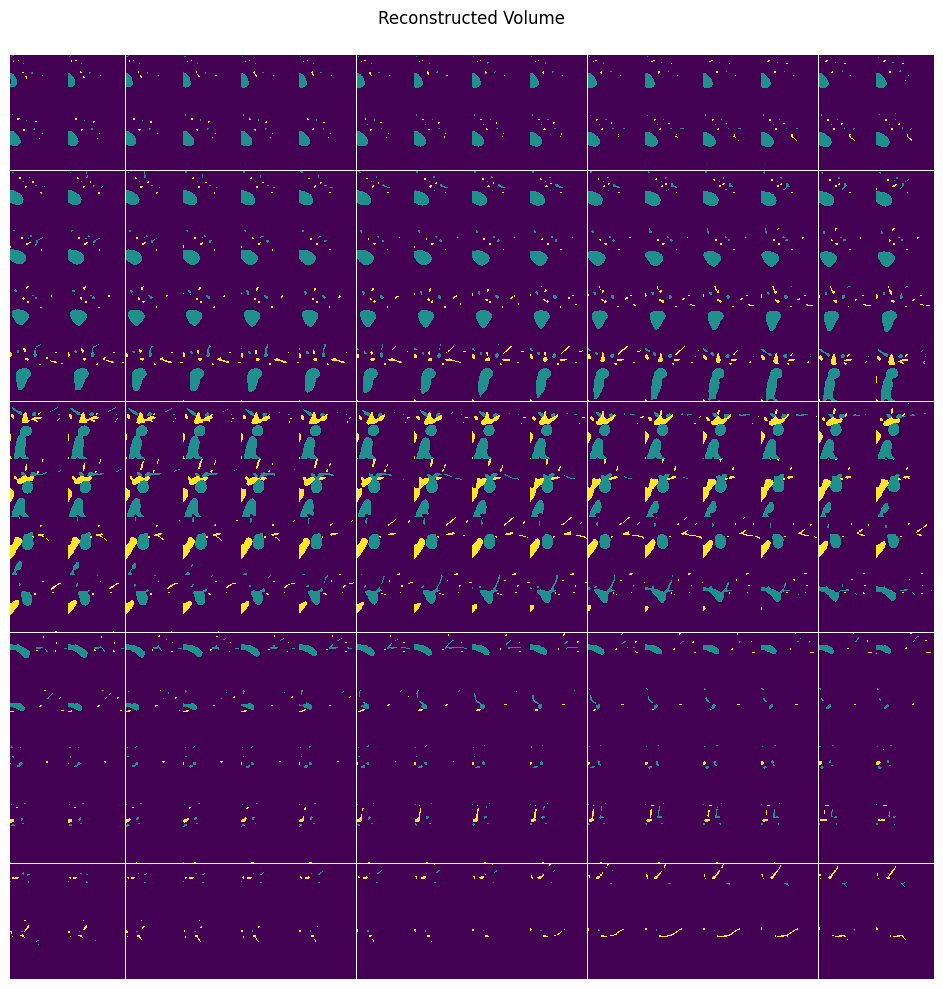

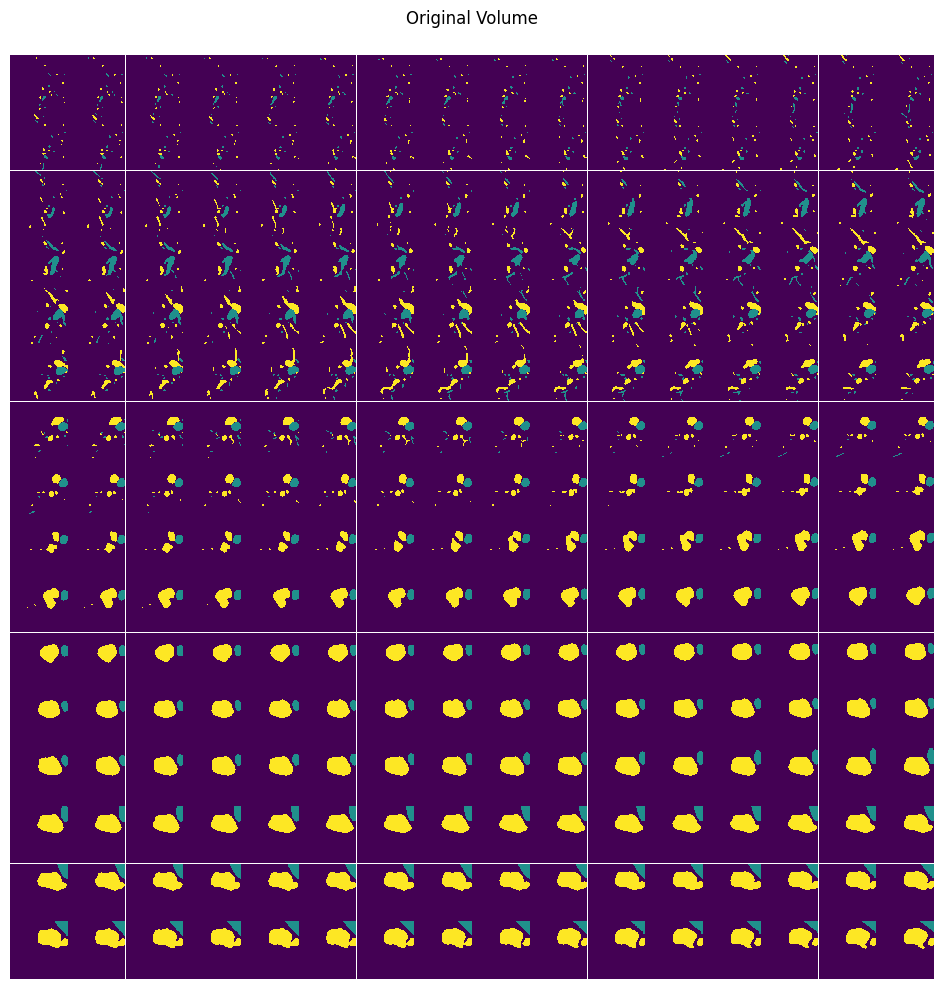

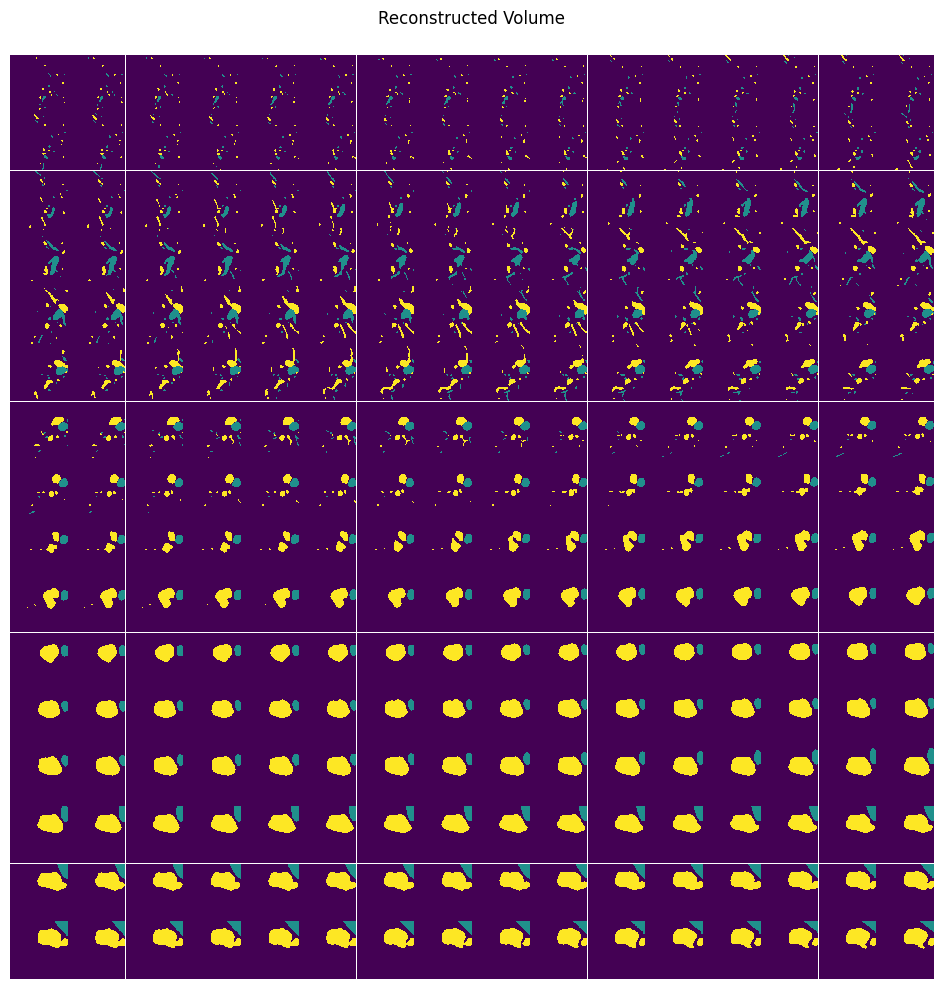

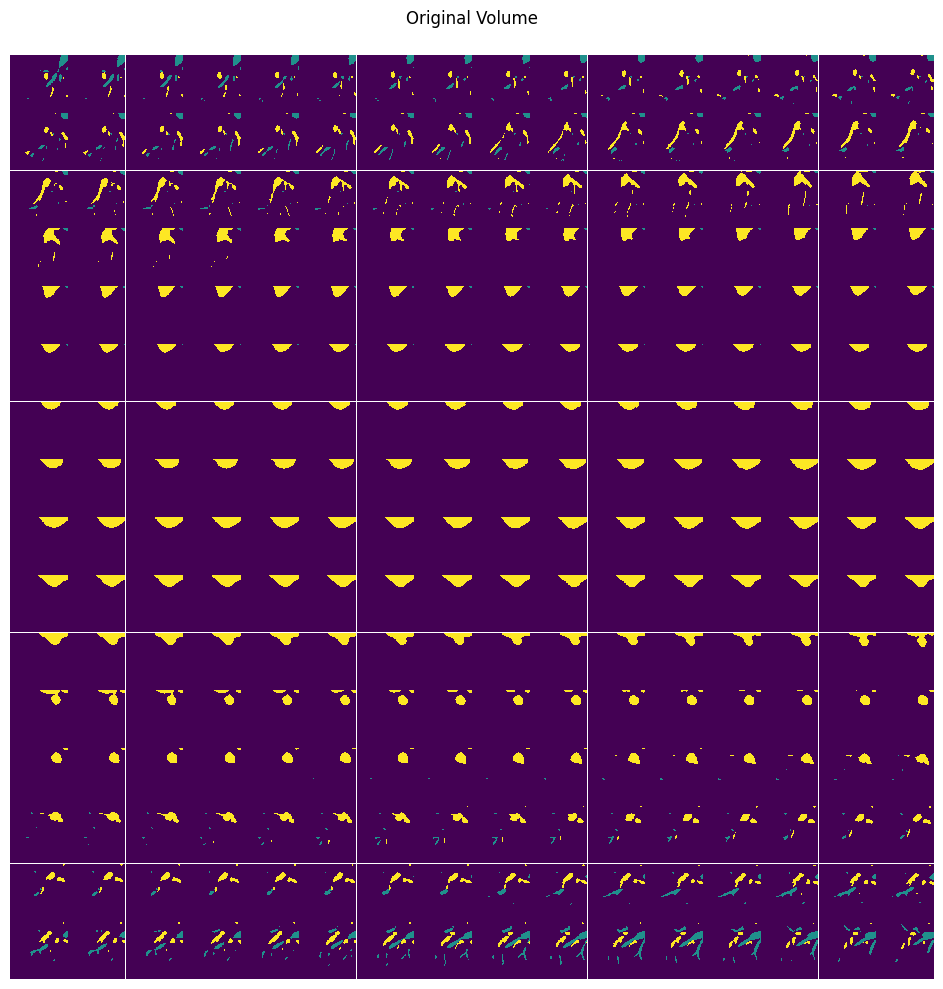

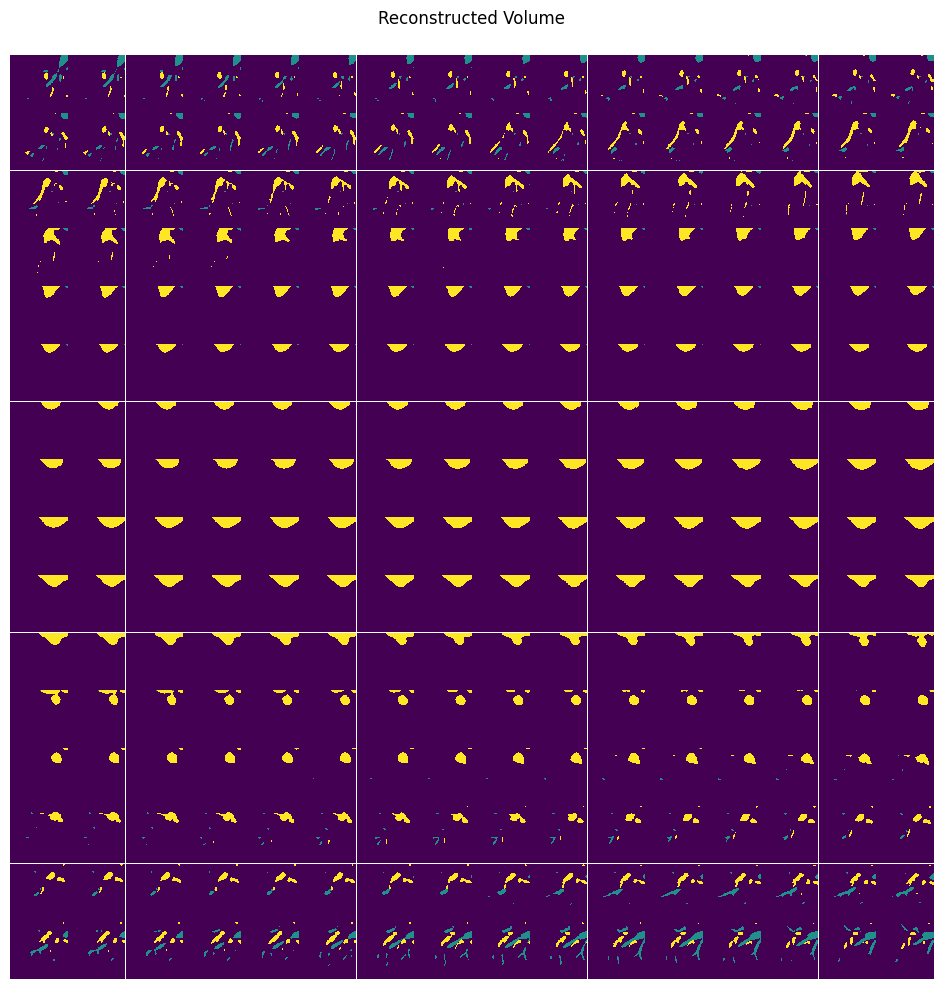

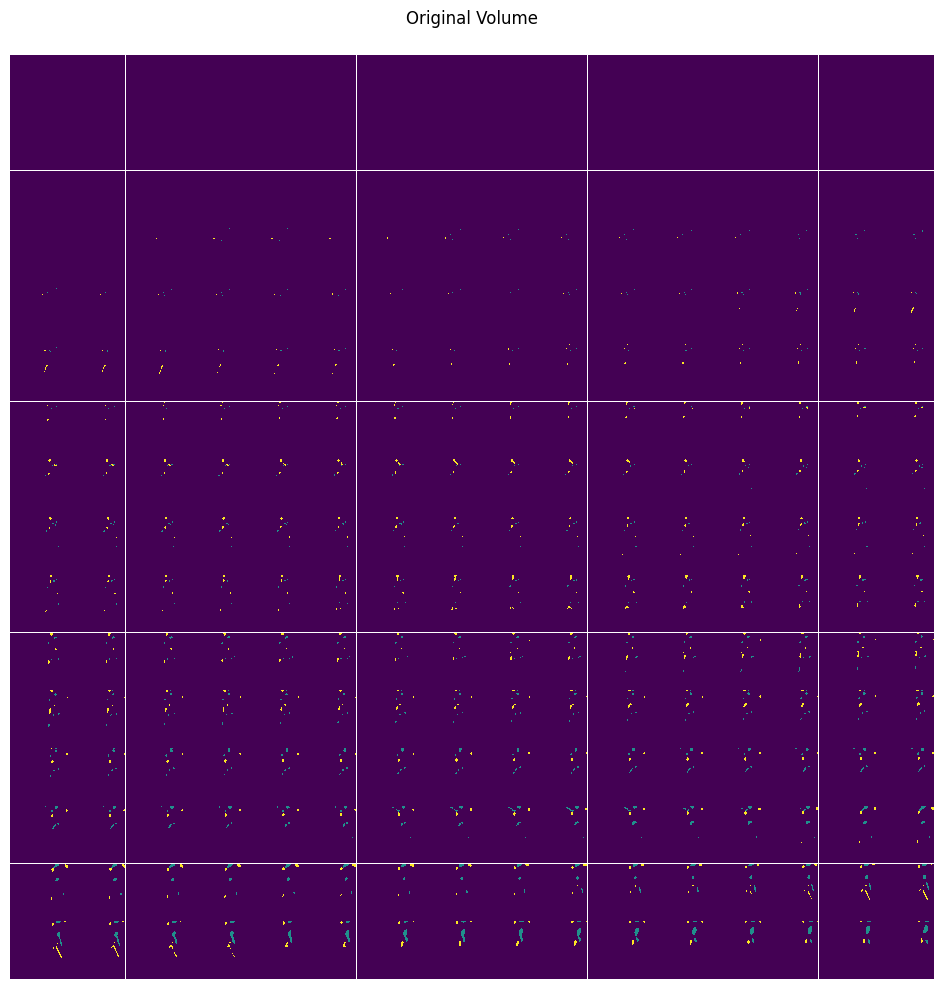

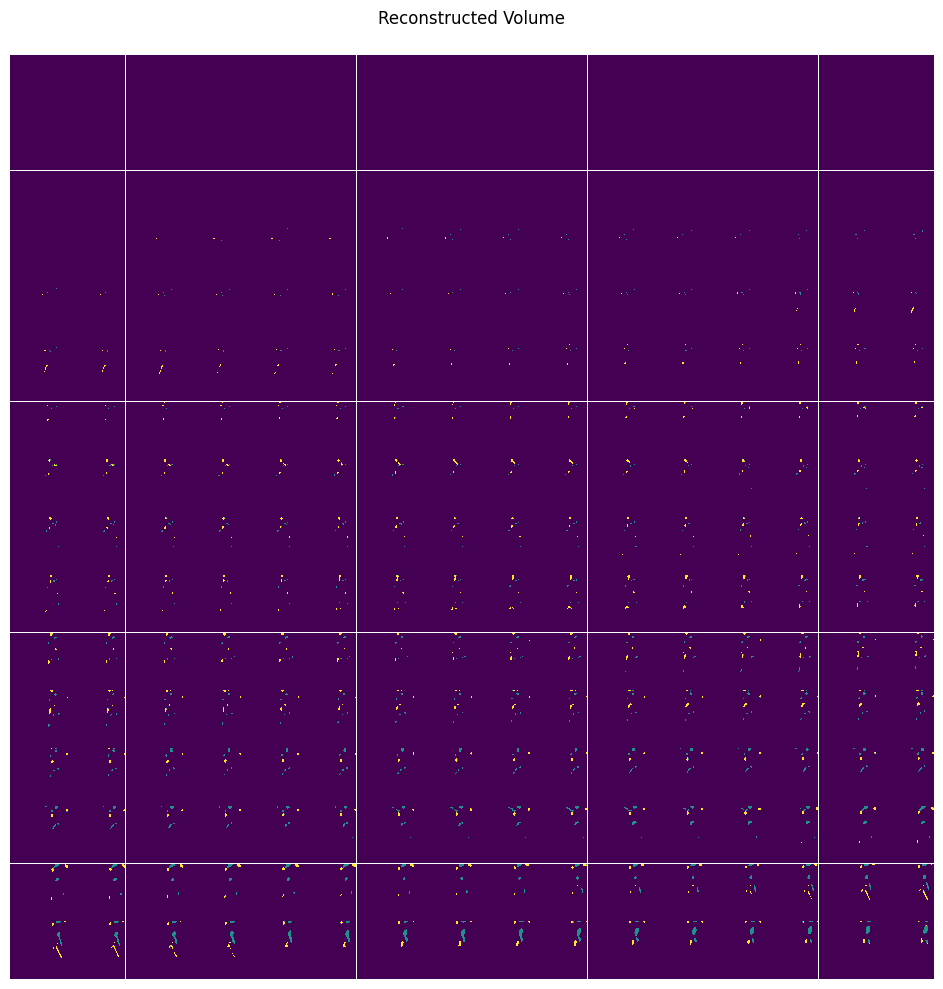

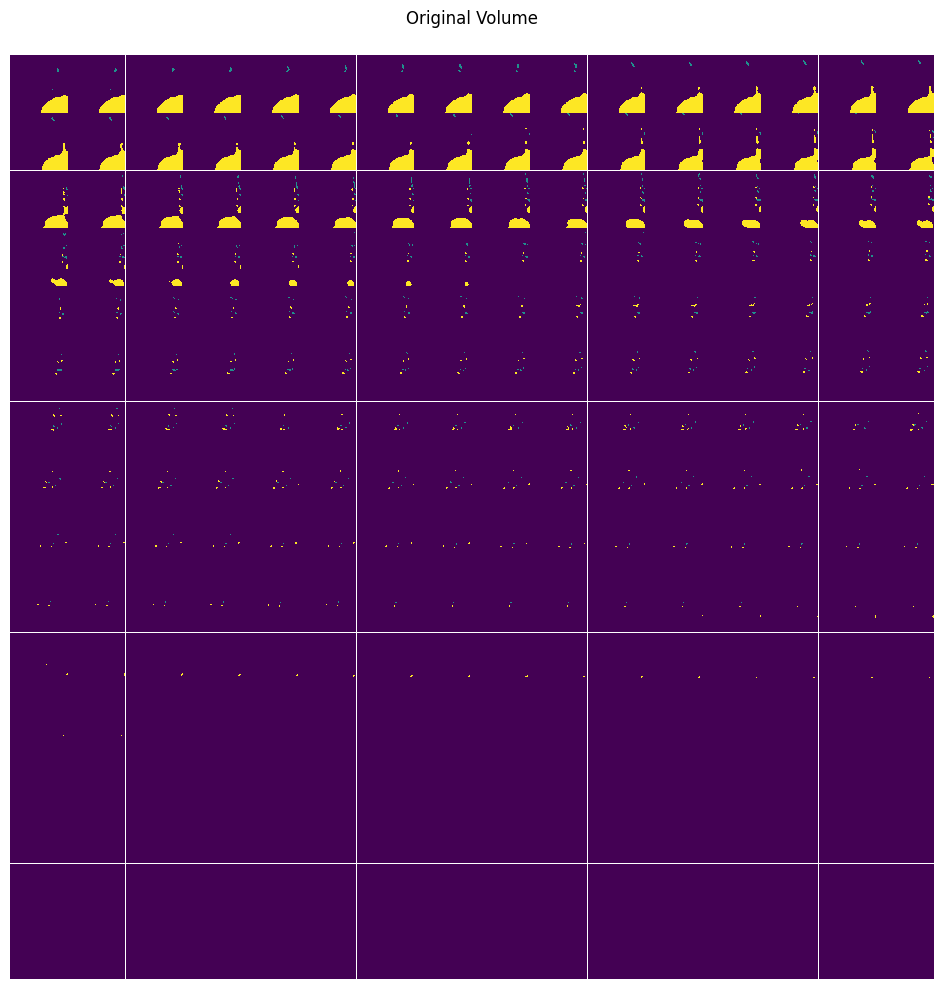

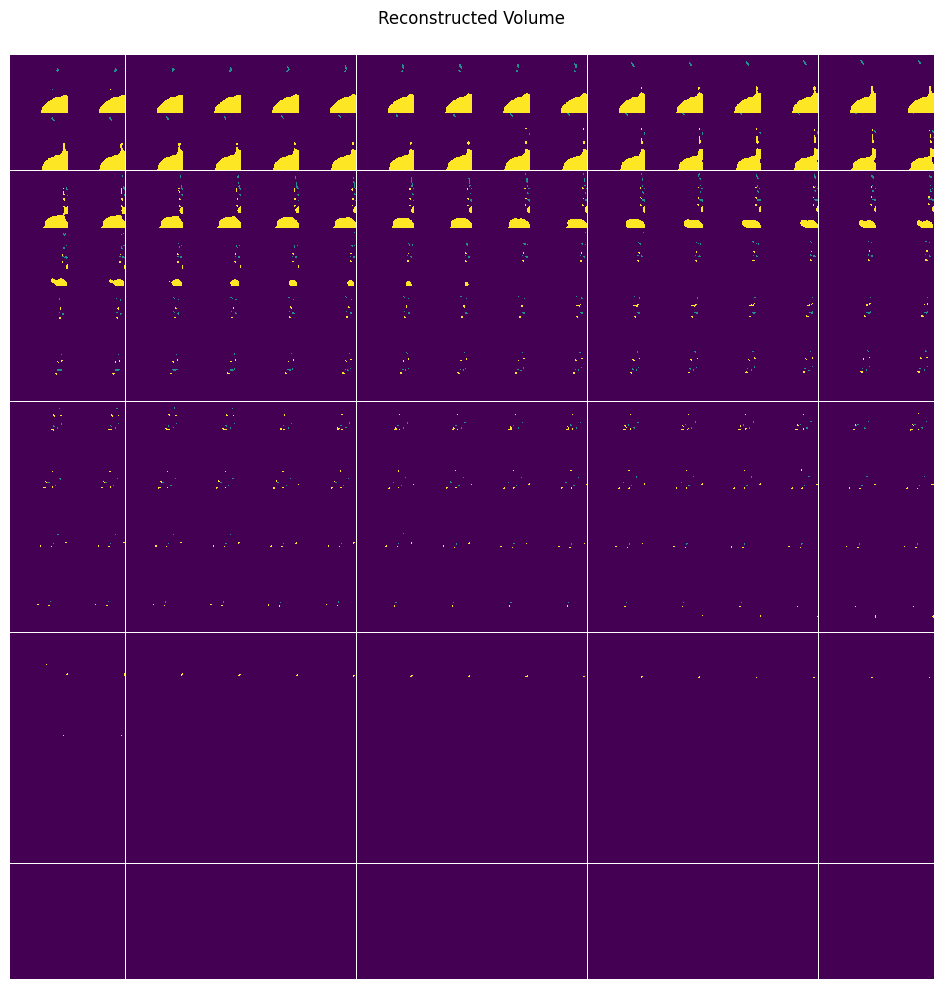

In [28]:
#Attempting 3d Visualization
from monai.visualize import utils as monai_visualize_utils

test_dir = "./images/Test"
test_data = MyDataset(test_dir, transform)
test_dataloader = DataLoader(test_data, batch_size = 1, shuffle= False)

model.eval()

with torch.no_grad():
    for batch_idx, (x,_) in enumerate(test_dataloader):
        x_hat = model(x)
        
        # Reconstruct and display the whole volume from the first test image
        original_volume = x[0, 0, :, :, :].detach().cpu().numpy()  
        reconstruction_volume = np.argmax(x_hat[0,:,:,:,:], axis=0)

        monai_visualize_utils.matshow3d(original_volume, title='Original Volume')
        monai_visualize_utils.matshow3d(reconstruction_volume, title='Reconstructed Volume')

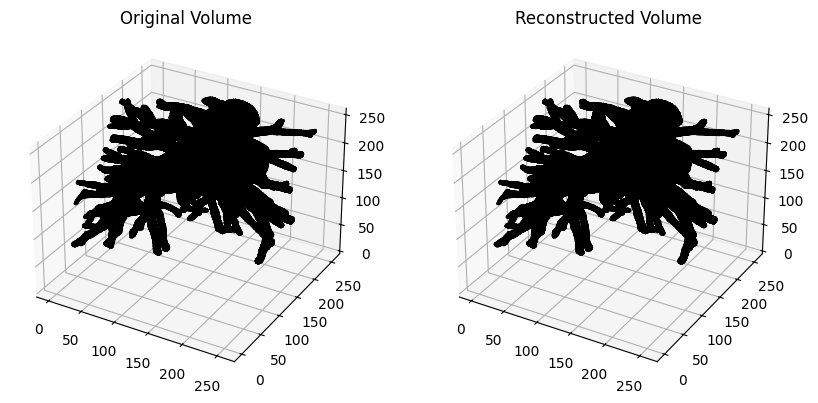

KeyboardInterrupt: 

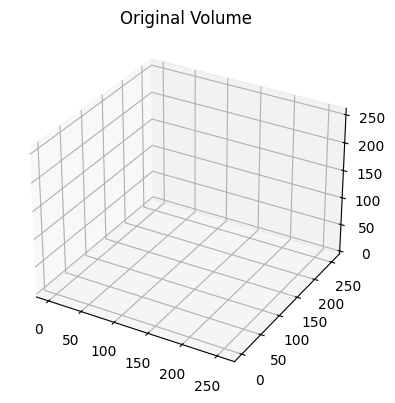

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

test_dir = "./images/Test"
test_data = MyDataset(test_dir, transform)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

model.eval()

with torch.no_grad():
    for batch_idx, (x, _) in enumerate(test_dataloader):
        x_hat = model(x)
        
        # Reconstruct and display the whole volume from the first test image
        original_volume = x[0, 0, :, :, :].detach().cpu().numpy()  
        reconstruction_volume = np.argmax(x_hat[0,:,:,:,:], axis=0)

        # Plot original and reconstructed volumes with titles using Matplotlib
        fig = plt.figure(figsize=(10, 5))

        # Plot original volume
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.set_title('Original Volume')
        ax1.voxels(original_volume, edgecolor='k')

        # Plot reconstructed volume
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.set_title('Reconstructed Volume')
        ax2.voxels(reconstruction_volume, edgecolor='k')

        plt.show()